In [1]:
################# Initial Conditions File ###################
# The purpose of this script is to create an initial conditions 
# file for the Alaskan Beaufort Sea shelf. Some of the values 
# are taken from the open boundary and initial conditions files 
# while others are set to small values. 

# Notes:
# - Though this is being adapted for paper 2 with individual 
#   river sediment classes, some of the files will still be 
#   read from the paper 1 directory since they are too large
#   to make copies of 
# - This is the same as initial_conds_beaufort_shelf_rivs_002.ipynb
#   but has one less mud class because it combines the Kukpuk and 
#   Kuparuk to have the same sediment classes
# - This is the same as initial_conds_beaufort_rivs_002_002.ipynb
#   but set to have unaggregated mud as the uniqe class instead of aggregated mud 
# - This has been updated to do 2020 instead and get rid of the three 
#   rivers not included in the Blaskey data 
#############################################################

In [2]:
# Load in the packages
from netCDF4 import Dataset
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
from cftime import num2date, date2num
#import time

In [3]:
# TEST
ar = np.arange(0,11,1)
print(ar)
print(len(ar))
print(ar[0:10])
print(ar[10])

[ 0  1  2  3  4  5  6  7  8  9 10]
11
[0 1 2 3 4 5 6 7 8 9]
10


In [4]:
# Open grid file to read in dimensions
#nc1 = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/Code/KakAKgrd_shelf_big010_smooth006.nc')
nc_f1 = '/projects/brun1463/ROMS/Kakak3_Alpine_2020/Include/KakAKgrd_shelf_big010_smooth006.nc' # UPDATE PATH
nc1 = Dataset(nc_f1, 'r')

In [5]:
# Open the sed_bed_toy test case restrat_mix_ini.nc file to pull values from there
#nc2 = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/Code/restrat_mix_ini.nc')
nc_f2 = '/projects/brun1463/ROMS/Kakak3_Alpine_2020/Scripts/Initial_conds/restrat_mix_ini.nc' # UPDATE PATH
nc2 = Dataset(nc_f2, 'r')

In [6]:
# Read in dimensions from the grid
xi_psi_tmp = nc1.variables['xi_psi']
xi_rho_tmp = nc1.variables['xi_rho']
xi_u_tmp = nc1.variables['xi_u']
xi_v_tmp = nc1.variables['xi_v']
eta_psi_tmp = nc1.variables['eta_psi']
eta_rho_tmp = nc1.variables['eta_rho']
eta_u_tmp = nc1.variables['eta_u']
eta_v_tmp = nc1.variables['eta_v']
bath_tmp = nc1.variables['h']

# Save dimensions
Lp = len(xi_rho_tmp)
Mp = len(eta_rho_tmp)
Lm = Lp-2
Mm = Mp-2
L = Lm+1
M = Mm+1

In [7]:
# Fill the missing dimensions with data from sed_bed_toy test case
#s_w_tmp = nc2.dimensions['s_w']
s_w_tmp = np.arange(0, 21, 1)
s_w_tmp_len = len(s_w_tmp)

#tracer_tmp = nc2.dimensions['tracer']
#tracer_tmp_len = len(tracer_tmp)
tracer_tmp_len = 19 # 19 (mud01 - mud14, sand01, sand02, sand03, salt, temp) ;7 (mud01, mud02, sand01, sand02, sand03) # 35 # (33 sediment, salt, temp)

s_rho_tmp = 20

Nbed_tmp = 11 # 10, 41

one_tmp = 1

two_tmp = 2

# temporary time length
#time_tmp = 1
#time_tmp = 615258000 # now set to hour 1; hour 0: 615254400.0 # 2019
time_tmp = 646880400  # 615258000 # now set to hour 1; hour 0: 615254400.0 # 2020
time_tmp_len = 1

# set ocean_time (time since initializtion)
ocean_time_tmp = time_tmp
#print('ocean_time: ', ocean_time_tmp[0])

In [8]:
# Assign values for variables
# theta_b (S-coordinate bottom control parameter)
theta_b_tmp = np.asarray(2) #3.0

# theta_s (S-coordinate surface control parameter)
theta_s_tmp = np.asarray(1) #1.0

# Tcline (S-coordinate surface/bottom layer width)
Tcline_tmp = np.asarray(5.0)

# hc (S-coordinate parameter, critical depth)
hc_tmp = np.asarray(5.0)

In [9]:
# ----------------- Use OBC files to find initial values ----------------
# For variables that we have info on from open boundary condition (OBC)
# files, read in those values into this to set as initial conditions

In [10]:
# Salt (salinity)
# Read in the OBC file 
#salt_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/final_boundary_conditions/attempt007/salt_clm_009.nc') # UPDATE PATH
salt_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/salt_clm_001.nc') # UPDATE PATH


# Make an array to hold these initial values
salt_tmp = np.empty((time_tmp_len, s_rho_tmp, Mp, Lp))

# Fill the array
salt_tmp[:,:,:,:] = salt_clm_obc.salt[0,:,:,:].values

# Check that this worked
print('salt: ', salt_tmp[0,0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(salt_clm_obc)

salt:  0.0


In [11]:
# Temperature (potential temperature)
# Read in the OBC file 
#temp_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/final_boundary_conditions/attempt007/temp_clm_008.nc') # UPDATE PATH
temp_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/temp_clm_001.nc') # UPDATE PATH


# Make an array to hold these initial values
temp_tmp = np.empty((time_tmp_len, s_rho_tmp, Mp, Lp))

# Fill the array
temp_tmp[:,:,:,:] = temp_clm_obc.temp[0,:,:,:].values

# Check that this worked
print('temp: ', temp_tmp[0,0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(temp_clm_obc)

temp:  0.0


In [12]:
# Zeta (free surface)
# Read in the OBC file 
#zeta_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/final_boundary_conditions/attempt007/zeta_clm_005.nc') # UPDATE PATH
zeta_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/zeta_clm_2020_004.nc') # UPDATE PATH


# Make an array to hold these initial values
zeta_tmp = np.empty((time_tmp_len, Mp, Lp))

# Fill the array
zeta_tmp[:,:,:] = zeta_clm_obc.zeta[0,:,:].values

# Check that this worked
print('zeta: ', zeta_tmp[0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(zeta_clm_obc)

zeta:  -0.0


In [13]:
# u (u momentum)
# Read in the OBC file 
u_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/u_currents_clm_001.nc') # UPDATE PATH
#u_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/artificial_boundaries/artificial_u_clm_001.nc') # TEMP

# Make an array to hold these initial values
u_tmp = np.empty((time_tmp_len, s_rho_tmp, Mp, L))

# Fill the array
u_tmp[:,:,:,:] = u_clm_obc.u[0,:,:,:].values

# Check that this worked
print('u: ', u_tmp[0,0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(u_clm_obc)

u:  0.0


In [14]:
# ubar (vertically integrated u-momentum component)
# Read in the OBC file 
ubar_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/ubar_currents_clm_001.nc') # UPDATE PATH
#ubar_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/artificial_boundaries/artificial_ubar_clm_001.nc') # TEMP

# Make an array to hold these initial values
ubar_tmp = np.empty((time_tmp_len, Mp, L))

# Fill the array
ubar_tmp[:,:,:] = ubar_clm_obc.ubar[0,:,:].values

# Check that this worked
print('ubar: ', ubar_tmp[0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(ubar_clm_obc)

ubar:  0.0


In [15]:
# v (v momentum)
# Read in the OBC file 
v_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/v_currents_clm_002_fix02.nc') # UPDATE PATH
#v_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/artificial_boundaries/artificial_v_clm_001.nc') # TEMP

# Make an array to hold these initial values
v_tmp = np.empty((time_tmp_len, s_rho_tmp, M, Lp))

# Fill the array
v_tmp[:,:,:,:] = v_clm_obc.v[0,:,:,:].values

# Check that this worked
print('v: ', v_tmp[0,0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(v_clm_obc)

v:  0.0


In [16]:
# vbar (vertically integrated v-momentum component)
# Read in the OBC file 
vbar_clm_obc = xr.open_dataset('/scratch/alpine/brun1463/ROMS_scratch/Kakak3_Alpine_2020_scratch/Final_bryclm_conds/Attempt001/vbar_currents_clm_002.nc') # UPDATE PATH
#vbar_clm_obc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/ROMS_interpolate_data_scripts_output/artificial_boundaries/artificial_vbar_clm_001.nc') # TEMP

# Make an array to hold these initial values
vbar_tmp = np.empty((time_tmp_len, M, Lp))

# Fill the array
vbar_tmp[:,:,:] = vbar_clm_obc.vbar[0,:,:].values

# Check that this worked
print('vbar: ', vbar_tmp[0,0,0])

# Remove the salt_clm_OBC file for memory sake
del(vbar_clm_obc)

vbar:  0.0


In [17]:
# ----------------- Use sustr/svstr files to find initial values ----------------
# For surface stress variables that we have info on from HYCOM
# files, read in those values into this to set as initial conditions
# This is not needed so ignore this for now

In [18]:
# # sustr (surface u-momentum stress)
# # Read in the sustr forcing file 
# sustr_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/Code/sustr_forcing_file_kaktovik_shelf_hycom_data_0002.nc')

# # Make an array to hold these initial values
# sustr_tmp = np.empty((time_tmp_len, MP, L))

# # Fill the array
# sustr_tmp[:,:,:] = sustr_frc.sustr[0,:,:].values

# # Check that this worked
# print('sustr: ', sustr_tmp[0,0,0])

# # Remove the file for memory sake
# del(sustr_frc)

In [19]:
# # svstr (surface v-momentum stress)
# # Read in the svstr forcing file 
# svstr_frc = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska/Code/svstr_forcing_file_kaktovik_shelf_hycom_data_0002.nc')

# # Make an array to hold these initial values
# svstr_tmp = np.empty((time_tmp_len, M, Lp))

# # Fill the array
# svstr_tmp[:,:,:] = svstr_frc.svstr[0,:,:].values

# # Check that this worked
# print('svstr: ', svstr_tmp[0,0,0])

# # Remove the file for memory sake
# del(svstr_frc)

In [20]:
# --------------------- End use of OBC to fill values ----------------------

In [21]:
# Variables taken from test case or other ROMS output
# Load in ROMS output
#roms_out = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj_002/Model_Outputs/dbsed0009/ocean_his_beaufort_rivers_13rivs_13seabed_dbsed0009_00001.nc')
roms_out = xr.open_dataset('/pl/active/moriarty_lab/BriannaU/Paper1/2020_version/Output/dbsed0003/ocean_his_beaufort_shelf_2020_dbsed0003_0001.nc')

# Cs_r (S-coordinate stretching curves at RHO-points)
# Use value from ROMS output
Cs_r_tmp = roms_out.Cs_r.values
print('Cs_r: ', Cs_r_tmp[0])

# Cs_w (S-coordinate stretching curves at W-points)
# Use value from ROMS output
Cs_w_tmp = roms_out.Cs_w.values
print('Cs_w: ', Cs_w_tmp[0])

# sc_r (S-coordinate at RHO-points)
# NOT SURE WHAT TO DO HERE
sc_r_tmp2 = nc2.variables['sc_r']
sc_r_tmp = np.full((s_rho_tmp), sc_r_tmp2[0], dtype='f8')
print('sc_r: ', sc_r_tmp[0])

# sc_w (S-coordinate at W-points)
# NOT SURE WHAT TO DO HERE
sc_w_tmp2 = nc2.variables['sc_w']
sc_w_tmp = np.full((s_w_tmp_len), sc_w_tmp2[0], dtype='f8')
print('Cs_r: ', Cs_r_tmp[0])

# Delete the roms output to save space
del(roms_out)

Cs_r:  -0.9982328699255587
Cs_w:  -1.0
sc_r:  -0.9750000000000001
Cs_r:  -0.9982328699255587


In [22]:
# Load in the sediment seabed percent data from 
# dbSeabed to use below
#allsed_pcnt = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Kaktovik_Alaska_2019/dbSeabed_data/bri_interpolation/allsed_pcnt_interpolated04.nc')
allsed_pcnt = xr.open_dataset('/projects/brun1463/ROMS/Kakak3_Alpine_2020/Scripts/Initial_conds/allsed_pcnt_interpolated04.nc')
print(allsed_pcnt)

# The data has the percentages in decimal format already

# If the original data are in whole number percent, use below to replace
# these with the decimal version
print(allsed_pcnt.mud01_pcnt[100,100].values)
# allsed_pcnt['mud01_pcnt'] = (('eta_rho', 'xi_rho'), allsed_pcnt.mud01_pcnt.values/100)
# print(allsed_pcnt.mud01_pcnt[100,100].values)
# allsed_pcnt['mud02_pcnt'] = (('eta_rho', 'xi_rho'), allsed_pcnt.mud02_pcnt.values/100)
# allsed_pcnt['sand01_pcnt'] = (('eta_rho', 'xi_rho'), allsed_pcnt.sand01_pcnt.values/100)
# allsed_pcnt['sand02_pcnt'] = (('eta_rho', 'xi_rho'), allsed_pcnt.sand02_pcnt.values/100)
# allsed_pcnt['sand03_pcnt'] = (('eta_rho', 'xi_rho'), allsed_pcnt.sand03_pcnt.values/100)

<xarray.Dataset>
Dimensions:      (eta_rho: 206, xi_rho: 608)
Coordinates:
  * eta_rho      (eta_rho) float64 0.0 1.0 2.0 3.0 ... 202.0 203.0 204.0 205.0
  * xi_rho       (xi_rho) float64 0.0 1.0 2.0 3.0 ... 604.0 605.0 606.0 607.0
Data variables:
    mud01_pcnt   (eta_rho, xi_rho) float64 ...
    mud02_pcnt   (eta_rho, xi_rho) float64 ...
    sand01_pcnt  (eta_rho, xi_rho) float64 ...
    sand02_pcnt  (eta_rho, xi_rho) float64 ...
    sand03_pcnt  (eta_rho, xi_rho) float64 ...
    lat_rho      (eta_rho, xi_rho) float64 ...
    lon_rho      (eta_rho, xi_rho) float64 ...
0.49504950495049505


### Split up the Seabed Mud Percentages by Region
Before we can calculate bulk bed properties based on the percentages loaded in, need to split those percentages by section so that we know how much sediment is in each region but is correctly split up by class. 

It looks like mud01_pcnt and mud02_pcnt are just the total percentage of mud in the seabed(on rho points) divided evenly in half between the two mud classes. So, we would want to keep mud01_pcnt the same since this is our unaggregated mudthat is going to be the same class everywhere - in the seabed and in the rivers. Need to split mud02_pcnt regionally and assign those values to each of the correct classes....

I think we can just find/partition things into each region, then make it so the key region is 1 and outside areas are 0, then multiply this by mud02_pcnt to get the new percentage of the mud in those regions

In [23]:
# Make functions to help with masking 
# Make masks to isolate each region, starting with breaking things up by depth 
# Make a function to mask the data
def masked_array(data, threshold):
    """
    This function takes an array and masks all values that are less
    than a certain given threshold. The functions returns 1 for areas that meet 
    the condition and 0 for areas that don't. So areas where the array is less
    than the threshold get returned as 1 and areas greater than the threshold
    are returned as 0. This function maintains the shape of the array.
    
    """
    return (data <= threshold).astype(int)

# Make a function to mask the data but that takes two thresholds
def masked_array_lowhigh_2dloop(data, lower, upper):
    """
    This function takes an array and masks all values that are less
    than a certain given threshold. The functions returns 1 for areas that meet 
    the condition and 0 for areas that don't. So areas where the array is less
    than the threshold get returned as 1 and areas greater than the threshold
    are returned as 0. This function maintains the shape of the array.
    
    """
    mask_tmp = np.empty_like((data))
    
    # Loop through dimension 1
    for i in range(len(data[:,0])):
        # Loop through dimension 2
        for j in range(len(data[0,:])):
            # Compare against threshold 
            value = data[i,j]
            if lower < value <= upper:
                mask_tmp[i,j] = 1
            else:
                mask_tmp[i,j] = 0
    
    
    return (mask_tmp).astype(int)

# Make a function to mask the data - higher
def masked_array_higher(data, threshold):
    """
    This function takes an array and masks all values that are less
    than a certain given threshold. The functions returns 1 for areas that meet 
    the condition and 0 for areas that don't. So areas where the array is less
    than the threshold get returned as 1 and areas greater than the threshold
    are returned as 0. This function maintains the shape of the array.
    
    """
    return (data >= threshold).astype(int)

In [24]:
# Load in the model grid 
#grid = xr.open_dataset('/Users/brun1463/Desktop/Research_Lab/Beaufort_Shelf_Rivers_proj/Model_Inputs/Grids/KakAKgrd_shelf_big010_smooth006.nc')
grid = xr.open_dataset('/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_002/Include/KakAKgrd_shelf_big010_smooth006.nc')

# Pull out some dimensions
eta_rho_len = len(grid.eta_rho)
xi_rho_len = len(grid.xi_rho)
s_rho_len = int(20)

In [25]:
# Make the masks to partition the seabed into different regions 

# Call the function to make the mask
# Leave in the region that is nudged/past the slope since we will need 
# to put sediment there regardless

# 0 - 10 m 
h_masked1 = grid.h.copy()
mask_0_10m_rho = masked_array_lowhigh_2dloop(h_masked1, 0, 10)

# 10 - 30 m
h_masked2 = grid.h.copy()
mask_10_30m_rho = masked_array_lowhigh_2dloop(h_masked2, 10, 30)

# 30 - 60 m
h_masked3 = grid.h.copy()
mask_30_60m_rho = masked_array_lowhigh_2dloop(h_masked3, 30, 60)

# > 60 m 
h_masked4 = grid.h.copy()
mask_60_end_rho = masked_array_lowhigh_2dloop(h_masked4, 60, 2200)

In [26]:
# Partition the seabed into the different regions 

# Old partitions: 166, 300, 446

# Make the nearshore sections 
mask_0_10m_rho_plot2 = mask_0_10m_rho.copy()
idx_ones_0_10m2 = np.where(mask_0_10m_rho_plot2 == 1)
# Set everywhere it is 1 equal to 2 
#mask_0_10m_rho_plot2[idx_ones_0_10m2] = 2
# Make an empty list to hold the indices for center
idx_ones_0_10m_far_left_etas = []
idx_ones_0_10m_far_left_xis = []
idx_ones_0_10m_center_left_etas = []
idx_ones_0_10m_center_left_xis = []
idx_ones_0_10m_center_right_etas = []
idx_ones_0_10m_center_right_xis = []
idx_ones_0_10m_far_right_etas = []
idx_ones_0_10m_far_right_xis = []
# Loop through these indices and find where they are in certain ranges
for i in range(len(idx_ones_0_10m2[0])):
    # Pull out the eta and the xi
    eta_tmp = idx_ones_0_10m2[0][i]
    xi_tmp = idx_ones_0_10m2[1][i]
    # Check if this is in the far left range
    if xi_tmp < 186:
        idx_ones_0_10m_far_left_etas.append(eta_tmp)
        idx_ones_0_10m_far_left_xis.append(xi_tmp)
    # Check if this is in the center left range
    elif 186 <= xi_tmp < 320:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_0_10m_center_left_etas.append(eta_tmp)
        idx_ones_0_10m_center_left_xis.append(xi_tmp)
    # Check if this is in the center right range
    elif 320 <= xi_tmp < 466:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_0_10m_center_right_etas.append(eta_tmp)
        idx_ones_0_10m_center_right_xis.append(xi_tmp)
        # Check if this is in the far right range
    elif xi_tmp >= 466:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_0_10m_far_right_etas.append(eta_tmp)
        idx_ones_0_10m_far_right_xis.append(xi_tmp)

# Make this 3 for center and 4 for right
mask_0_10m_rho_plot2[idx_ones_0_10m_far_left_etas[:],idx_ones_0_10m_far_left_xis[:]] = 2
mask_0_10m_rho_plot2[idx_ones_0_10m_center_left_etas[:],idx_ones_0_10m_center_left_xis[:]] = 3
mask_0_10m_rho_plot2[idx_ones_0_10m_center_right_etas[:],idx_ones_0_10m_center_right_xis[:]] = 4
mask_0_10m_rho_plot2[idx_ones_0_10m_far_right_etas[:],idx_ones_0_10m_far_right_xis[:]] = 5



# Make the middle sections 
mask_10_30m_rho_plot2 = mask_10_30m_rho.copy()
idx_ones_10_30m2 = np.where(mask_10_30m_rho_plot2 == 1)
# Set everything in here equal to 5 
#mask_10_30m_rho_plot2[idx_ones_10_30m2] = 5
# Make an empty list to hold the indices for center
idx_ones_10_30m_far_left_etas = []
idx_ones_10_30m_far_left_xis = []
idx_ones_10_30m_center_left_etas = []
idx_ones_10_30m_center_left_xis = []
idx_ones_10_30m_center_right_etas = []
idx_ones_10_30m_center_right_xis = []
idx_ones_10_30m_far_right_etas = []
idx_ones_10_30m_far_right_xis = []
# Loop through these indices and find where they are in certain ranges
for i in range(len(idx_ones_10_30m2[0])):
    # Pull out the eta and the xi
    eta_tmp = idx_ones_10_30m2[0][i]
    xi_tmp = idx_ones_10_30m2[1][i]
    # Check if this is in the far left range
    if xi_tmp < 186:
        idx_ones_10_30m_far_left_etas.append(eta_tmp)
        idx_ones_10_30m_far_left_xis.append(xi_tmp)
    # Check if this is in the center left range
    if 186 <= xi_tmp < 320:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_10_30m_center_left_etas.append(eta_tmp)
        idx_ones_10_30m_center_left_xis.append(xi_tmp)
    # Check if this is in the center right range
    if 320 <= xi_tmp < 466:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_10_30m_center_right_etas.append(eta_tmp)
        idx_ones_10_30m_center_right_xis.append(xi_tmp)
    # Check if this is in the far right range
    if xi_tmp >= 466:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_10_30m_far_right_etas.append(eta_tmp)
        idx_ones_10_30m_far_right_xis.append(xi_tmp)
# Make this 6 and 7 for the center and right 
mask_10_30m_rho_plot2[idx_ones_10_30m_far_left_etas[:],idx_ones_10_30m_far_left_xis[:]] = 6
mask_10_30m_rho_plot2[idx_ones_10_30m_center_left_etas[:],idx_ones_10_30m_center_left_xis[:]] = 7
mask_10_30m_rho_plot2[idx_ones_10_30m_center_right_etas[:],idx_ones_10_30m_center_right_xis[:]] = 8
mask_10_30m_rho_plot2[idx_ones_10_30m_far_right_etas[:],idx_ones_10_30m_far_right_xis[:]] = 9



# Make the outer sections
mask_30_60m_rho_plot2 = mask_30_60m_rho.copy()
idx_ones_30_60m2 = np.where(mask_30_60m_rho_plot2 == 1)
# Set everything in here equal to 8
#mask_30_60m_rho_plot2[idx_ones_30_60m2] = 8
# Make an empty list to hold the indices for center
idx_ones_30_60m_far_left_etas = []
idx_ones_30_60m_far_left_xis = []
idx_ones_30_60m_center_left_etas = []
idx_ones_30_60m_center_left_xis = []
idx_ones_30_60m_center_right_etas = []
idx_ones_30_60m_center_right_xis = []
idx_ones_30_60m_far_right_etas = []
idx_ones_30_60m_far_right_xis = []
# Loop through these indices and find where they are in certain ranges
for i in range(len(idx_ones_30_60m2[0])):
    # Pull out the eta and the xi
    eta_tmp = idx_ones_30_60m2[0][i]
    xi_tmp = idx_ones_30_60m2[1][i]
    # Check if this is in the far left range
    if xi_tmp < 186:
        idx_ones_30_60m_far_left_etas.append(eta_tmp)
        idx_ones_30_60m_far_left_xis.append(xi_tmp)
    # Check if this is in the center left range
    if 186 <= xi_tmp < 320:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_30_60m_center_left_etas.append(eta_tmp)
        idx_ones_30_60m_center_left_xis.append(xi_tmp)
    # Check if this is in the center right range
    if 320 <= xi_tmp < 466:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_30_60m_center_right_etas.append(eta_tmp)
        idx_ones_30_60m_center_right_xis.append(xi_tmp)
    # Check if this is in the far right range
    if xi_tmp >= 466:
        #print('xi_tmp: ', xi_tmp)
        #input('press enter to continue...')
        idx_ones_30_60m_far_right_etas.append(eta_tmp)
        idx_ones_30_60m_far_right_xis.append(xi_tmp)
# Make this 6 and 7 for the center and right 
mask_30_60m_rho_plot2[idx_ones_30_60m_far_left_etas[:],idx_ones_30_60m_far_left_xis[:]] = 10
mask_30_60m_rho_plot2[idx_ones_30_60m_center_left_etas[:],idx_ones_30_60m_center_left_xis[:]] = 11
mask_30_60m_rho_plot2[idx_ones_30_60m_center_right_etas[:],idx_ones_30_60m_center_right_xis[:]] = 12
mask_30_60m_rho_plot2[idx_ones_30_60m_far_right_etas[:],idx_ones_30_60m_far_right_xis[:]] = 13



# Make the outest section
mask_60_end_rho_plot2 = mask_60_end_rho.copy()
idx_ones_60_end2 = np.where(mask_60_end_rho_plot2 == 1)
# Set everything in here equal to 8
mask_60_end_rho_plot2[idx_ones_60_end2] = 14

# Add in the nudged sections to the last group = 14
# Set the number of cells in the sponge on each open boundary
c_west = 36
c_north = 45
c_east = 36
# Make these regions 14
mask_0_10m_rho_plot2[:,:c_west] = 14
mask_0_10m_rho_plot2[:,-c_west:] = 14
mask_10_30m_rho_plot2[:,:c_west] = 14
mask_10_30m_rho_plot2[:,-c_west:] = 14
mask_30_60m_rho_plot2[:,:c_west] = 14
mask_30_60m_rho_plot2[:,-c_west:] = 14
mask_60_end_rho_plot2[:,:c_west] = 14
mask_60_end_rho_plot2[:,-c_west:] = 14

/projects/brun1463/software/anaconda/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'label'


Text(0.5, 0, 'X (km)')

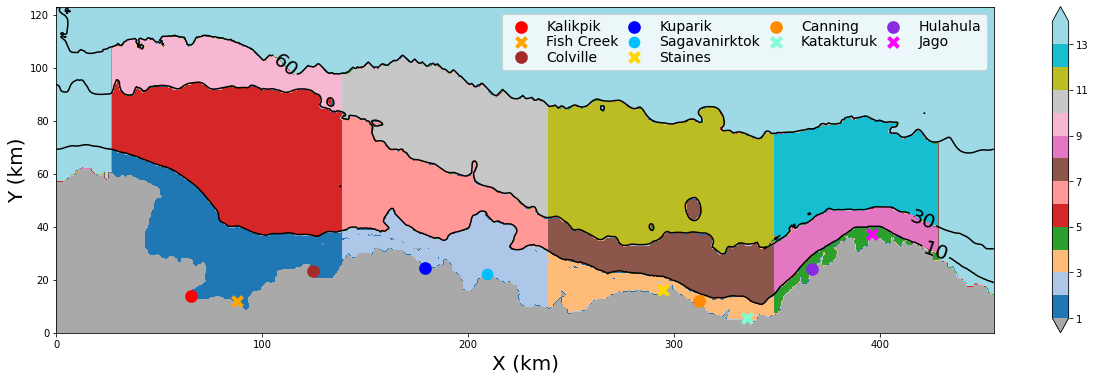

In [27]:
# Plot this to make sure it worked
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

# Plot all of this mayhem
# Make a fake xy with the right resolution to be able to plot without the angle
x_rho_flat = np.arange(0,750*len(grid.x_rho[0,:]),750)
y_rho_flat = np.arange(0,600*len(grid.y_rho[:,0]),600)
# Prep the data by  ultiplying by the mask and trimming
# Trim 
x_rho_flat_trimmed = x_rho_flat[c_west:-c_west]

# Set the fontsize 
fontsize = 20

# Set the levels 
lev11 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# Set the colormap
cmap11 = cm.get_cmap('tab20', 14)
cmap11.set_under(color='darkgrey')

# Make the plot
fig11, ax11 = plt.subplots(figsize=(21,6))

# Plot the bathymetry
cs11 = ax11.contour(x_rho_flat/1000, y_rho_flat/1000, grid.h.values, levels=[10,30,60], 
            colors='black', label=True)
ax11.clabel(cs11, inline=True, fontsize=20)

# Plot region 1 [0 - 10 m, across all longitudes]
cp37 = ax11.contourf(x_rho_flat/1000, y_rho_flat/1000, mask_0_10m_rho_plot2*grid.mask_rho.values, 
                   lev11, cmap=cmap11, extend='both')

# Plot region 2 [10 - 30 m, across all longitudes]
cp38 = ax11.contourf(x_rho_flat/1000, y_rho_flat/1000, mask_10_30m_rho_plot2*grid.mask_rho.values, 
                     lev11, cmap=cmap11)

# Plot region 3 [30 - 60 m, across all longitudes]
cp39 = ax11.contourf(x_rho_flat/1000, y_rho_flat/1000, mask_30_60m_rho_plot2*grid.mask_rho.values, 
                     lev11, cmap=cmap11)

# Plot region 4 [60 - end, across all longitudes]
cp40 = ax11.contourf(x_rho_flat/1000, y_rho_flat/1000, mask_60_end_rho_plot2*grid.mask_rho.values, 
                     lev11, cmap=cmap11)

# Make the colorbar (numbers/values mean the region)
cbar11 = plt.colorbar(cp37, extend='both')

# Plot the 14 rivers in the grid
# Go from West to East
# Kalikpik River
eta_kal_idx = 23 #22
xi_kal_idx = 87
s1 = ax11.scatter(x_rho_flat[xi_kal_idx]/1000, y_rho_flat[eta_kal_idx]/1000, 
            marker='.', s=300, linewidth=4, color='r', label='Kalikpik')

# Fish Creek
eta_fis_idx = 20
xi_fis_idx = 117 #116
s2 = ax11.scatter(x_rho_flat[xi_fis_idx]/1000, y_rho_flat[eta_fis_idx]/1000, 
            marker='x', s=100, linewidth=4, color='orange', label='Fish Creek')

# Colville River
eta_col_idx = 39
xi_col_idx = 166 #166
s3 = ax11.scatter(x_rho_flat[xi_col_idx]/1000, y_rho_flat[eta_col_idx]/1000, 
            marker='.', s=300, linewidth=4, color='brown', label='Colville')

# Sakonowyak River
eta_sak_idx = 46 #45
xi_sak_idx = 234
#s4 = ax11.scatter(x_rho_flat[xi_sak_idx]/1000, y_rho_flat[eta_sak_idx]/1000, 
 #           marker='x', s=150, linewidth=6, color='green', label='Sakonowyak')

# Kuparik
# Kukpuk - Change this to be labeled as the Kuparuk since it  is actually the main channel 
# of the Kuparuk River
# Kuparik
# Kukpuk
eta_kuk_idx = 41 #40
xi_kuk_idx = 239
s5 = ax11.scatter(x_rho_flat[xi_kuk_idx]/1000, y_rho_flat[eta_kuk_idx]/1000, 
            marker='.', s=300, linewidth=4, color='b', label='Kuparik')

# Kuparuk - commented out to move dot onto old Kukpuk since that is the main 
# channel of the Kuparuk 
#s6 = ax7[3].scatter(x_rho_flat_trimmed[xi_kup_idx]/1000, y_rho_flat[eta_kup_idx]/1000, 
 #           marker='x', s=100, linewidth=4, color='pink', label='Kuparuk')


# Fawn Creek
#eta_faw_idx = 44 #43
#xi_faw_idx = 249
#s7 = ax3[1].scatter(x_rho_flat[xi_faw_idx]/1000, y_rho_flat[eta_faw_idx]/1000, 
 #           marker='.', s=300, linewidth=4, color='darkviolet', label='Fawn Creek')

# Putuligayuk River
eta_put_idx = 28 #27
xi_put_idx = 264
#s8 = ax11.scatter(x_rho_flat[xi_put_idx]/1000, y_rho_flat[eta_put_idx]/1000, 
 #           marker='x', s=100, linewidth=4, color='dodgerblue', label='Putuligayuk')

# Sagavanirktok River
eta_sag_idx = 37 #36
xi_sag_idx = 279
s9 = ax11.scatter(x_rho_flat[xi_sag_idx]/1000, y_rho_flat[eta_sag_idx]/1000, 
            marker='.', s=300, linewidth=3, color='deepskyblue', label='Sagavanirktok')

# Canning River
# Staines River
eta_sta_idx = 27 #26
xi_sta_idx = 393
s10 = ax11.scatter(x_rho_flat[xi_sta_idx]/1000, y_rho_flat[eta_sta_idx]/1000, 
            marker='x', s=100, linewidth=4, color='gold', label='Staines')

# Canning River
eta_can_idx = 20 #19
xi_can_idx = 416
s11 = ax11.scatter(x_rho_flat[xi_can_idx]/1000, y_rho_flat[eta_can_idx]/1000, 
            marker='.', s=300, linewidth=4, color='darkorange', label='Canning')

# Katakturuk River
eta_kat_idx = 9 #8
xi_kat_idx = 447
s12 = ax11.scatter(x_rho_flat[xi_kat_idx]/1000, y_rho_flat[eta_kat_idx]/1000, 
            marker='x', s=100, linewidth=4, color='aquamarine', label='Katakturuk')

# Hulahula River
eta_hul_idx = 40
xi_hul_idx = 489
s13 = ax11.scatter(x_rho_flat[xi_hul_idx]/1000, y_rho_flat[eta_hul_idx]/1000, 
            marker='.', s=300, linewidth=4, color='blueviolet', label='Hulahula')

# Jago River
eta_jag_idx = 62 #61
xi_jag_idx = 528
s14 = ax11.scatter(x_rho_flat[xi_jag_idx]/1000, y_rho_flat[eta_jag_idx]/1000, 
            marker='x', s=100, linewidth=4, color='magenta', label='Jago')

# Siksik River
eta_sik_idx = 46
xi_sik_idx = 574 #573
#s15 = ax11.scatter(x_rho_flat[xi_sik_idx]/1000, y_rho_flat[eta_sik_idx]/1000, 
 #           marker='.', s=300, linewidth=4, color='deeppink', label='Siksik')

# Temporary not too bad legend
ax11.legend(loc='upper right', ncol=4, fontsize=14, columnspacing=0.1, labelspacing=0.1)

# Label the axes
ax11.set_ylabel('Y (km)', fontsize=fontsize)
ax11.set_xlabel('X (km)', fontsize=fontsize)

In [28]:
# Assuming the above worked, use if statements and such to separate out the different regions
# and multiply them by mud02_pcnt to section this out

# Save the section arrays multiplied by the rho mask
mask_0_10m_rho_plot = mask_0_10m_rho_plot2*grid.mask_rho.values
mask_10_30m_rho_plot = mask_10_30m_rho_plot2*grid.mask_rho.values
mask_30_60m_rho_plot = mask_30_60m_rho_plot2*grid.mask_rho.values
mask_60_end_rho_plot = mask_60_end_rho_plot2*grid.mask_rho.values


# Seabed section 1
# Make an array of zeros
mud02_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 2
seabed_section1_idx = np.where(mask_0_10m_rho_plot == 2)
# Set these areas to 1 in the other plot
mud02_pcnt_mask[seabed_section1_idx] = 1

# Seabed section 2
# Make an array of zeros
mud03_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 3
seabed_section2_idx = np.where(mask_0_10m_rho_plot == 3)
# Set these areas to 1 in the other plot
mud03_pcnt_mask[seabed_section2_idx] = 1

# Seabed section 3
# Make an array of zeros
mud04_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 4
seabed_section3_idx = np.where(mask_0_10m_rho_plot == 4)
# Set these areas to 1 in the other plot
mud04_pcnt_mask[seabed_section3_idx] = 1

# Seabed section 4
# Make an array of zeros
mud05_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 5
seabed_section4_idx = np.where(mask_0_10m_rho_plot == 5)
# Set these areas to 1 in the other plot
mud05_pcnt_mask[seabed_section4_idx] = 1

# Seabed section 5
# Make an array of zeros
mud06_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 6
seabed_section5_idx = np.where(mask_10_30m_rho_plot == 6)
# Set these areas to 1 in the other plot
mud06_pcnt_mask[seabed_section5_idx] = 1

# Seabed section 6
# Make an array of zeros
mud07_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 7
seabed_section6_idx = np.where(mask_10_30m_rho_plot == 7)
# Set these areas to 1 in the other plot
mud07_pcnt_mask[seabed_section6_idx] = 1

# Seabed section 7
# Make an array of zeros
mud08_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 8
seabed_section7_idx = np.where(mask_10_30m_rho_plot == 8)
# Set these areas to 1 in the other plot
mud08_pcnt_mask[seabed_section7_idx] = 1

# Seabed section 8
# Make an array of zeros
mud09_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 9
seabed_section8_idx = np.where(mask_10_30m_rho_plot == 9)
# Set these areas to 1 in the other plot
mud09_pcnt_mask[seabed_section8_idx] = 1

# Seabed section 9
# Make an array of zeros
mud10_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 10
seabed_section9_idx = np.where(mask_30_60m_rho_plot == 10)
# Set these areas to 1 in the other plot
mud10_pcnt_mask[seabed_section9_idx] = 1

# Seabed section 10
# Make an array of zeros
mud11_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 11
seabed_section10_idx = np.where(mask_30_60m_rho_plot == 11)
# Set these areas to 1 in the other plot
mud11_pcnt_mask[seabed_section10_idx] = 1

# Seabed section 11
# Make an array of zeros
mud12_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 12
seabed_section11_idx = np.where(mask_30_60m_rho_plot == 12)
# Set these areas to 1 in the other plot
mud12_pcnt_mask[seabed_section11_idx] = 1

# Seabed section 12
# Make an array of zeros
mud13_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 13
seabed_section12_idx = np.where(mask_30_60m_rho_plot == 13)
# Set these areas to 1 in the other plot
mud13_pcnt_mask[seabed_section12_idx] = 1

# Seabed section 13
# Make an array of zeros
mud14_pcnt_mask = np.zeros_like(allsed_pcnt.mud02_pcnt)
# Get the indices where it equals 14
seabed_section13_idx1 = np.where(mask_60_end_rho_plot == 14)
seabed_section13_idx2 = np.where(mask_30_60m_rho_plot == 14)
seabed_section13_idx3 = np.where(mask_10_30m_rho_plot == 14)
seabed_section13_idx4 = np.where(mask_0_10m_rho_plot == 14)
# Set these areas to 1 in the other plot
mud14_pcnt_mask[seabed_section13_idx1] = 1
mud14_pcnt_mask[seabed_section13_idx2] = 1
mud14_pcnt_mask[seabed_section13_idx3] = 1
mud14_pcnt_mask[seabed_section13_idx4] = 1

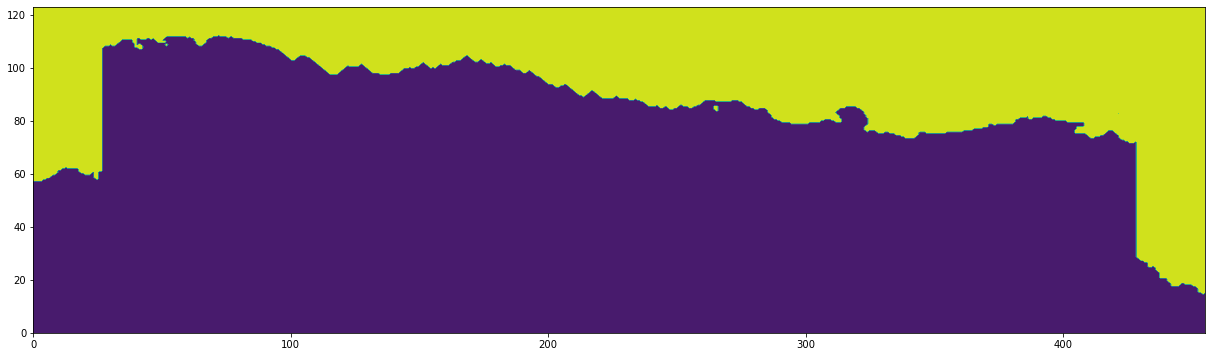

In [29]:
# Plot sections to see if this worked [so far so good]
fig1, ax1 = plt.subplots(figsize=(21,6))
ax1.contourf(x_rho_flat/1000, y_rho_flat/1000, mud14_pcnt_mask)

In [30]:
# Now multiply the masks by the percents to get the percents for each
# seabed section's mud class
# **Only multiply each sediment percent mask by mud02_pcnt since only
# the aggregated mud (mud02) is being split up by seabed section and river

mud02_pcnt_real = mud02_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud03_pcnt_real = mud03_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud04_pcnt_real = mud04_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud05_pcnt_real = mud05_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud06_pcnt_real = mud06_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud07_pcnt_real = mud07_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud08_pcnt_real = mud08_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud09_pcnt_real = mud09_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud10_pcnt_real = mud10_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud11_pcnt_real = mud11_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud12_pcnt_real = mud12_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud13_pcnt_real = mud13_pcnt_mask*allsed_pcnt.mud02_pcnt.values
mud14_pcnt_real = mud14_pcnt_mask*allsed_pcnt.mud02_pcnt.values

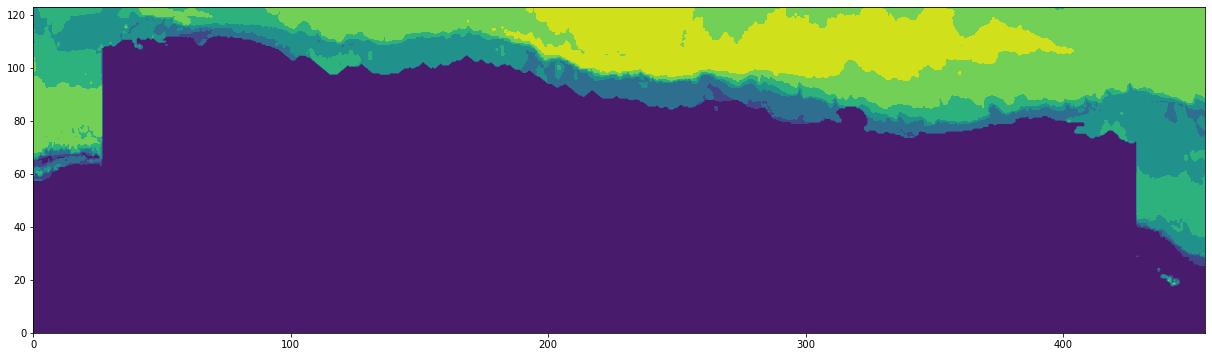

In [31]:
# Plot to see if this worked 
fig1, ax1 = plt.subplots(figsize=(21,6))
ax1.contourf(x_rho_flat/1000, y_rho_flat/1000, mud14_pcnt_real)

### Now apply these new percentages to the seabed bulk properties

In [32]:
# Use the percent values from above to calculate the
# weighted bed properties in the grid and save them to 
# arrays that are the right shape
# Only use the sediment that is intially in the seabed for these calculations 

# *Note: The bed properties are being left to just the original mud01 and 
# mud02 parameters/percentages since these are technically the same and splitting
# up mud02 into a bunch of different classes does not change these properties

# Bed Porosity
# Calculate bed porosity by taking weighted average
# First set all of the porosities
# SEABED 
mud01_por = 0.70
mud02_por = 0.70
sand01_por = 0.70
sand02_por = 0.70
sand03_por = 0.70

# Now take the weight of these
bed_por_tmp = ((mud01_por*allsed_pcnt.mud01_pcnt.values)+(mud02_por*allsed_pcnt.mud02_pcnt.values)+
              (sand01_por*allsed_pcnt.sand01_pcnt.values)+(sand02_por*allsed_pcnt.sand02_pcnt.values)+
              (sand03_por*allsed_pcnt.sand03_pcnt.values))

print(np.shape(bed_por_tmp))

# Make an empty array to hold the bed porosity that will be the right shape
bed_por_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))


# Bed Grain Diameter
# Calculate a bed grain diameter by taking the weighted average
# has shape (time, eta, xi)
# This should be in meters so save the meter version
# Set all of the grain diameters
mud01_diam = 0.00003 # m, 0.03125 # mm 
mud02_diam = 0.000004 # m, 0.0039 # mm
sand01_diam = 0.00018 # m, 0.18 # mm
sand02_diam = 0.00071 # m, 0.71 # mm
sand03_diam = 0.032 # m, 32 # mm

# Take the weighted average
bed_diam_tmp = ((mud01_diam*allsed_pcnt.mud01_pcnt.values)+(mud02_diam*allsed_pcnt.mud02_pcnt.values)+
              (sand01_diam*allsed_pcnt.sand01_pcnt.values)+(sand02_diam*allsed_pcnt.sand02_pcnt.values)+
              (sand03_diam*allsed_pcnt.sand03_pcnt.values))

# Make an empty array to hold the bed porosity that will be the right shape
bed_diam_all = np.empty((time_tmp_len, Mp, Lp))


# Bed Grain Density
# Calculate bed grain density by taking the weighted average
# Set the grain densities
mud01_rho = 2650 # kg/m3 CHANGE
mud02_rho = 2650 # kg/m3 CHANGE 
sand01_rho = 2650 # kg/m3
sand02_rho = 2650 # kg/m3
sand03_rho = 2650 # kg/m3

# Take the weighted average
bed_rho_tmp = ((mud01_rho*allsed_pcnt.mud01_pcnt.values)+(mud02_rho*allsed_pcnt.mud02_pcnt.values)+
              (sand01_rho*allsed_pcnt.sand01_pcnt.values)+(sand02_rho*allsed_pcnt.sand02_pcnt.values)+
              (sand03_rho*allsed_pcnt.sand03_pcnt.values))

# Make an empty array to hold the bed density that will be the right shape 
bed_rho_all = np.empty((time_tmp_len, Mp, Lp))


# Bed Tau Critical
# Set the grain critical shear stresses (SUBJECT TO CHANGE)
mud01_tauc = 0.18 # N/m2
mud02_tauc = 0.18 # N/m2
sand01_tauc = 0.18 # N/m2
sand02_tauc = 0.34 # N/m2
sand03_tauc = 24 #N/m2

# Take the weighted average
bed_tauc_tmp = ((mud01_tauc*allsed_pcnt.mud01_pcnt.values)+(mud02_tauc*allsed_pcnt.mud02_pcnt.values)+
              (sand01_tauc*allsed_pcnt.sand01_pcnt.values)+(sand02_tauc*allsed_pcnt.sand02_pcnt.values)+
              (sand03_tauc*allsed_pcnt.sand03_pcnt.values))

# Make an empty array to hold bed critical shear stress that will be the right shape
bed_tauc_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))


# Bed Settling Velocity
# Set the grain settling velocities (SUBJECT TO CHANGE)
mud01_setv = 0.001 # m/s, 1.0 # mm/s CHANGE 
mud02_setv = 0.0001 # m/s, 0.1 # mm/s CHANGE
sand01_setv = 0.015 # m/s, 15.0 # mm/s
sand02_setv = 0.09 # m/s, 90.0 # mm/s
sand03_setv = 1.0 # m/s, 1000.0 # mm/s

# Take the weighted average 
bed_setv_tmp = ((mud01_setv*allsed_pcnt.mud01_pcnt.values)+(mud02_setv*allsed_pcnt.mud02_pcnt.values)+
              (sand01_setv*allsed_pcnt.sand01_pcnt.values)+(sand02_setv*allsed_pcnt.sand02_pcnt.values)+
              (sand03_setv*allsed_pcnt.sand03_pcnt.values))

# Make an empty array to hold bed settling velocity that will be the right shape
bed_setv_all = np.empty((time_tmp_len, Mp, Lp))


# Bed Biodiffusivity (TBD)


# Bed Erosion Stress (TBD)
# Divide the bed_tauc_tmp by the water density to 
# get bed erosion stress 
bed_eros_str_tmp = bed_tauc_tmp/1048 # m2/s2

# # Make an empty array to hold bed erosion stress that will be the right shape
# bed_eros_str_all = np.empty((time_tmp_len, Mp, Lp))


# # Save these values into arrays that are the same size as the seabed (time=1, Nbed, Mp, Lp)
# mud01_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
# mud02_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
# sand01_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
# sand02_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
# sand03_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))

# # Loo through to fill these
# # Time
# for i in range(time_tmp_len):
#     # Fill grain diameter
#     bed_diam_all[i,:,:] = bed_diam_tmp
#     # Fill grain density
#     bed_rho_all[i,:,:] = bed_rho_tmp
#     # Fill bed settling velocity
#     bed_setv_all[i,:,:] = bed_setv_tmp
#     # Fill bed erosion stress
#     bed_eros_str_all[i,:,:] = bed_eros_str_tmp
    
#     # Nbed
#     for n in range(Nbed_tmp):
#         #print('n: ', n)
#         # If we are at the bottom layer, make it all pebbles
#         if n == 10:
#             # mud01
#             mud01_pcnt_all[i,n,:,:] = 0
#             # mud02
#             mud02_pcnt_all[i,n,:,:] = 0
#             # sand01
#             sand01_pcnt_all[i,n,:,:] = 0
#             # sand02
#             sand02_pcnt_all[i,n,:,:] = 0
#             # sand03
#             sand03_pcnt_all[i,n,:,:] = 1
#             # bed porosity
#             bed_por_all[i,n,:,:] = sand03_por
#             # bed tau critical 
#             bed_tauc_all[i,n,:,:] = sand03_tauc
#         # For all other layers, use the data from above
#         else:
#             # mud01
#             mud01_pcnt_all[i,n,:,:] = allsed_pcnt.mud01_pcnt.values
#             # mud02
#             mud02_pcnt_all[i,n,:,:] = allsed_pcnt.mud02_pcnt.values
#             # sand01
#             sand01_pcnt_all[i,n,:,:] = allsed_pcnt.sand01_pcnt.values
#             # sand02
#             sand02_pcnt_all[i,n,:,:] = allsed_pcnt.sand02_pcnt.values
#             # sand03
#             sand03_pcnt_all[i,n,:,:] = allsed_pcnt.sand03_pcnt.values
#             # bed porosity
#             bed_por_all[i,n,:,:] = bed_por_tmp
#             # bed tau critical
#             bed_tauc_all[i,n,:,:] = bed_tauc_tmp


(206, 608)


In [33]:
# Save the percentages of different sediments making up the layers of the seabed 
# Make an empty array to hold bed erosion stress that will be the right shape
bed_eros_str_all = np.empty((time_tmp_len, Mp, Lp))


# Save these values into arrays that are the same size as the seabed (time=1, Nbed, Mp, Lp)
mud01_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud02_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud03_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud04_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud05_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud06_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud07_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud08_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud09_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud10_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud11_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud12_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud13_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
mud14_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
sand01_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
sand02_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
sand03_pcnt_all = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))

# Loo through to fill these
# Time
for i in range(time_tmp_len):
    # Fill grain diameter
    bed_diam_all[i,:,:] = bed_diam_tmp
    # Fill grain density
    bed_rho_all[i,:,:] = bed_rho_tmp
    # Fill bed settling velocity
    bed_setv_all[i,:,:] = bed_setv_tmp
    # Fill bed erosion stress
    bed_eros_str_all[i,:,:] = bed_eros_str_tmp
    
    # Nbed
    for n in range(Nbed_tmp):
        #print('n: ', n)
        # If we are at the bottom layer, make it all pebbles
        if n == 10:
            # mud01
            mud01_pcnt_all[i,n,:,:] = 0
            # mud02
            mud02_pcnt_all[i,n,:,:] = 0
            # mud03
            mud03_pcnt_all[i,n,:,:] = 0
            # mud04
            mud04_pcnt_all[i,n,:,:] = 0
            # mud05
            mud05_pcnt_all[i,n,:,:] = 0
            # mud06
            mud06_pcnt_all[i,n,:,:] = 0
            # mud07
            mud07_pcnt_all[i,n,:,:] = 0
            # mud08
            mud08_pcnt_all[i,n,:,:] = 0
            # mud09
            mud09_pcnt_all[i,n,:,:] = 0
            # mud10
            mud10_pcnt_all[i,n,:,:] = 0
            # mud11
            mud11_pcnt_all[i,n,:,:] = 0
            # mud12
            mud12_pcnt_all[i,n,:,:] = 0
            # mud13
            mud13_pcnt_all[i,n,:,:] = 0
            # mud14
            mud14_pcnt_all[i,n,:,:] = 0
            # sand01
            sand01_pcnt_all[i,n,:,:] = 0
            # sand02
            sand02_pcnt_all[i,n,:,:] = 0
            # sand03
            sand03_pcnt_all[i,n,:,:] = 1
            # bed porosity
            bed_por_all[i,n,:,:] = sand03_por
            # bed tau critical 
            bed_tauc_all[i,n,:,:] = sand03_tauc
        # For all other layers, use the data from above
        else:
            # mud01
            mud01_pcnt_all[i,n,:,:] = allsed_pcnt.mud01_pcnt.values
            # mud02
            mud02_pcnt_all[i,n,:,:] = mud02_pcnt_real
            # mud03
            mud03_pcnt_all[i,n,:,:] = mud03_pcnt_real
            # mud04
            mud04_pcnt_all[i,n,:,:] = mud04_pcnt_real
            # mud05
            mud05_pcnt_all[i,n,:,:] = mud05_pcnt_real
            # mud06
            mud06_pcnt_all[i,n,:,:] = mud06_pcnt_real
            # mud07
            mud07_pcnt_all[i,n,:,:] = mud07_pcnt_real
            # mud08
            mud08_pcnt_all[i,n,:,:] = mud08_pcnt_real
            # mud09
            mud09_pcnt_all[i,n,:,:] = mud09_pcnt_real
            # mud10
            mud10_pcnt_all[i,n,:,:] = mud10_pcnt_real
            # mud11
            mud11_pcnt_all[i,n,:,:] = mud11_pcnt_real
            # mud12
            mud12_pcnt_all[i,n,:,:] = mud12_pcnt_real
            # mud13
            mud13_pcnt_all[i,n,:,:] = mud13_pcnt_real
            # mud14
            mud14_pcnt_all[i,n,:,:] = mud14_pcnt_real
            # sand01
            sand01_pcnt_all[i,n,:,:] = allsed_pcnt.sand01_pcnt.values
            # sand02
            sand02_pcnt_all[i,n,:,:] = allsed_pcnt.sand02_pcnt.values
            # sand03
            sand03_pcnt_all[i,n,:,:] = allsed_pcnt.sand03_pcnt.values
            # bed porosity
            bed_por_all[i,n,:,:] = bed_por_tmp
            # bed tau critical
            bed_tauc_all[i,n,:,:] = bed_tauc_tmp

In [34]:
# Set the sediment parameters for the river sediments 
# All of these will be 0 since they are in the rivers
# but not on the shelf yet so initiall they should all be 0 

# Make arrays of zeros that are the right size that can be 
# used for all the river sediments in the netcdf file so 
# then the only repetition is in writing them to the netcdf

# Suspended Sediment 
riv_mud_ssc = np.zeros((time_tmp_len, s_rho_tmp, Mp, Lp))

# Fraction in seabed
riv_mud_frac = np.zeros((time_tmp_len, Nbed_tmp, Mp, Lp))

# Mass in seabed 
riv_mud_mass = np.zeros((time_tmp_len, Nbed_tmp, Mp, Lp))

In [35]:
# Check porosity
print(np.where(bed_por_all >= 1.0))
print(np.max(bed_por_all))
print(np.min(bed_por_all))
# Looking better so go with this for now

# print(bed_por_all[0,0,180,170])
# print((mud01_por*allsed_pcnt.mud01_pcnt[180,170].values)+(mud02_por*allsed_pcnt.mud02_pcnt[180,170].values)+
#               (sand01_por*allsed_pcnt.sand01_pcnt[180,170].values)+(sand02_por*allsed_pcnt.sand02_pcnt[180,170].values)+
#               (sand03_por*allsed_pcnt.sand03_pcnt[180,170].values))
# print(mud01_por, allsed_pcnt.mud01_pcnt[180,170].values, mud01_por*allsed_pcnt.mud01_pcnt[180,170].values)
# print(mud02_por, allsed_pcnt.mud02_pcnt[180,170].values, mud02_por*allsed_pcnt.mud02_pcnt[180,170].values)
# print(sand01_por, allsed_pcnt.sand01_pcnt[180,170].values, sand01_por*allsed_pcnt.sand01_pcnt[180,170].values)
# print(sand02_por, allsed_pcnt.sand02_pcnt[180,170].values, sand02_por*allsed_pcnt.sand02_pcnt[180,170].values)
# print(sand03_por, allsed_pcnt.sand03_pcnt[180,170].values, sand03_por*allsed_pcnt.sand03_pcnt[180,170].values)

# print(allsed_pcnt.mud01_pcnt[180,170].values+allsed_pcnt.mud02_pcnt[180,170].values+
#       allsed_pcnt.sand01_pcnt[180,170].values+allsed_pcnt.sand02_pcnt[180,170].values+
#       allsed_pcnt.sand03_pcnt[180,170].values)

# # try to normalize this 
# tot_frac = (allsed_pcnt.mud01_pcnt[180,170].values+allsed_pcnt.mud02_pcnt[180,170].values+
#       allsed_pcnt.sand01_pcnt[180,170].values+allsed_pcnt.sand02_pcnt[180,170].values+
#       allsed_pcnt.sand03_pcnt[180,170].values)
# newm01 = allsed_pcnt.mud01_pcnt[180,170].values/tot_frac
# newm02 = allsed_pcnt.mud02_pcnt[180,170].values/tot_frac
# news01 = allsed_pcnt.sand01_pcnt[180,170].values/tot_frac
# news02 = allsed_pcnt.sand02_pcnt[180,170].values/tot_frac
# news03 = allsed_pcnt.sand03_pcnt[180,170].values/tot_frac
# print(newm01, newm02, news01, news02, news03)
# print(newm01+newm02+news01+news02+news03)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
0.7000000000000002
0.0


In [36]:
# Set a bunch of bed stuff, some using the values from above
# ---------- Bed -----------
# bed_thickness (sediment layer thickness)
# Set thickness manually 
bed_thickness_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp))
bed_thickness_tmp[:,0:2,:,:] = 0.005 # m
bed_thickness_tmp[:,2:4,:,:] = 0.01 # m
bed_thickness_tmp[:,4,:,:] = 0.02 # m
bed_thickness_tmp[:,5:7,:,:] = 0.05 # m
bed_thickness_tmp[:,7:9,:,:] = 0.1 # m
bed_thickness_tmp[:,9,:,:] = 0.15 # m
bed_thickness_tmp[:,10,:,:] = 0.5 # m
print('bed thickness: ', bed_thickness_tmp[0,:,5,5])

# bed_age (sediment layer age)
# NOT SURE WHAT TO DO HERE
bed_age_tmp2 = nc2.variables['bed_age'][:]
bed_age_tmp = np.full((time_tmp_len, Nbed_tmp, Mp, Lp), bed_age_tmp2[0,0,0,0], dtype='f8')
print('bed_age: ', bed_age_tmp[0,0,0,0])

# bed_porosity (sediment layer porosity)
bed_porosity_tmp = bed_por_all
print('bed_porosity: ', bed_porosity_tmp[0,0,0,0])

# bed_biodiff (biodiffusivity at bottom of each layer)
# NOT SURE WHAT TO DO HERE
bed_biodiff_tmp2 = nc2.variables['bed_biodiff'][:]
bed_biodiff_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
#bed_biodiff_tmp = np.full((time_tmp_len, Nbed_tmp, Mp, Lp), bed_biodiff_tmp2[0,0,0,0], dtype='f8') # OLD
#print('bed_biodiff: ', bed_biodiff_tmp[0,0,0,0]) # OLD

# bed_tau_crit (tau critical in each layer)
bed_tau_crit_tmp = bed_tauc_all
print('bed_tau_crit: ', bed_tau_crit_tmp[0,0,0,0])

# Loop to fill bed_biodiff and bed_tau_crit
for n in range(Nbed_tmp):
    bed_biodiff_tmp[0,n,:,:] = bed_biodiff_tmp2[0,n,2,2]


bed thickness:  [0.005 0.005 0.01  0.01  0.02  0.05  0.05  0.1   0.1   0.15  0.5  ]
bed_age:  0.0
bed_porosity:  0.0
bed_tau_crit:  0.0


In [37]:
# ************************************* WITH DBSEABED ***************************************
# Set all of the sediment stuff manually for now using dbSeabed data 
# Can use bed properties from cell above 

# ------------ Sediment Stuff -------------
# --- Mud Class 1 (silt/clay, unaggregated) ---
# mud_01 (suspended chesive sediment, size class 01)
mud_01_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_01: ', mud_01_tmp[0,0,0,0])

# mudfrac_01 (cohesive sediment fraction, size class 01)
#mudfrac_01_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
mudfrac_01_tmp = mud01_pcnt_all.copy()

# mudmass_01 (cohesive sediment mass, size class 01)
mudmass_01_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density
# Method 1: Bed porosity
# mudmass_01_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_01_tmp[:,:,:,:])*(mud01_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_01_tmp[:,:,:,:] = (1-mud01_por)*(mudfrac_01_tmp[:,:,:,:])*(mud01_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 01: ', mudmass_01_tmp[0,:,100,100])
    

# --- Sand Class 1 (fine/very fine sand) ---
# sand_01 (suspended noncohesive sediment, size class 01)
sand_01_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('sand_01: ', sand_01_tmp[0,0,0,0])

# sandfrac_01 (noncohesive sediment fraction, size class 01)
sandfrac_01_tmp = sand01_pcnt_all.copy()
#sandfrac_01_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# sandmass_01 (noncohesive sediment mass, size class 01)
sandmass_01_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, andd ensity for first 10 layers, set to 0 for the bottom layer 
# Method 1: Bed porosity
# sandmass_01_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(sandfrac_01_tmp[:,:,:,:])*(sand01_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
sandmass_01_tmp[:,:,:,:] = (1-sand01_por)*(sandfrac_01_tmp[:,:,:,:])*(sand01_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('sand mass 01: ', sandmass_01_tmp[0,:,100,100])


# --- Sand Class 2 (medium/coarse sand) ---
# sand_02 (suspended noncohesive sediment, size class 02)
sand_02_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('sand_02: ', sand_02_tmp[0,0,0,0])

# sandfrac_02 (noncohesive sediment fraction, size class 02)
sandfrac_02_tmp = sand02_pcnt_all.copy()
#sandfrac_02_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# sandmass_02 (noncohesive sediment mass, size class 02)
sandmass_02_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, andd ensity for first 10 layers, set to 0 for the bottom layer 
# Method 1: Bed porosity
# sandmass_02_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(sandfrac_02_tmp[:,:,:,:])*(sand02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
sandmass_02_tmp[:,:,:,:] = (1-sand02_por)*(sandfrac_02_tmp[:,:,:,:])*(sand02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('sand mass 02: ', sandmass_02_tmp[0,:,100,100])


# --- Sand Class 3 (pebble) ---
# sand_03 (suspended noncohesive sediment, size class 03)
sand_03_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('sand_03: ', sand_03_tmp[0,0,0,0])

# sandfrac_03 (noncohesive sediment fraction, size class 03)
sandfrac_03_tmp = sand03_pcnt_all.copy()
#sandfrac_03_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# sandmass_03 (noncohesive sediment mass, size class 03)
sandmass_03_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density for first 10 layers, set to 0 for the bottom layer 
# Method 1: Bed porosity
# sandmass_03_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(sandfrac_03_tmp[:,:,:,:])*(sand03_rho)*(bed_thickness_tmp[:,0:2,:,:]) # kg/m2
# Method 2: Grain porosity
sandmass_03_tmp[:,:,:,:] = (1-sand03_por)*(sandfrac_03_tmp[:,:,:,:])*(sand03_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('sand mass 03: ', sandmass_03_tmp[0,:,100,100])

mud_01:  0.0
mud mass 01:  [ 1.96782178  1.96782178  3.93564356  3.93564356  7.87128713 19.67821782
 19.67821782 39.35643564 39.35643564 59.03465347  0.        ]
sand_01:  0.0
sand mass 01:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sand_02:  0.0
sand mass 02:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sand_03:  0.0
sand mass 03:  [3.93564356e-02 3.93564356e-02 7.87128713e-02 7.87128713e-02
 1.57425743e-01 3.93564356e-01 3.93564356e-01 7.87128713e-01
 7.87128713e-01 1.18069307e+00 3.97500000e+02]


In [38]:
# Do the same as above but for all of the different seabed sections/sediment classes

# --- Mud Class 2/Section 1 (silt, aggregated) ---
# mud_02 (suspended cohesive sediment, size class 02)
mud_02_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_02: ', mud_02_tmp[0,0,0,0])

# mud_frac_02 (cohesive sediment fraction, size class 02)
mudfrac_02_tmp = mud02_pcnt_all.copy()
#mudfrac_02_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_02 (cohesive sediment mass, size class 02)
mudmass_02_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_02_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_02_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 02: ', mudmass_02_tmp[0,:,100,100])


# --- Mud Class 3/Section 2 (silt, aggregated) ---
# mud_03 (suspended cohesive sediment, size class 02)
mud_03_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_03: ', mud_03_tmp[0,0,0,0])

# mud_frac_03 (cohesive sediment fraction, size class 03)
mudfrac_03_tmp = mud03_pcnt_all.copy()
#mudfrac_03_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_03 (cohesive sediment mass, size class 02)
mudmass_03_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_03_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_03_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_03_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 03: ', mudmass_03_tmp[0,:,100,100])


# --- Mud Class 4/Section 3 (silt, aggregated) ---
# mud_04 (suspended cohesive sediment, size class 02)
mud_04_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_04: ', mud_04_tmp[0,0,0,0])

# mud_frac_04 (cohesive sediment fraction, size class 03)
mudfrac_04_tmp = mud04_pcnt_all.copy()
#mudfrac_04_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_04 (cohesive sediment mass, size class 02)
mudmass_04_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_04_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_04_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 04: ', mudmass_04_tmp[0,:,100,100])


# --- Mud Class 5/Section 4 (silt, aggregated) ---
# mud_05 (suspended cohesive sediment, size class 02)
mud_05_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_05: ', mud_05_tmp[0,0,0,0])

# mud_frac_05 (cohesive sediment fraction, size class 03)
mudfrac_05_tmp = mud05_pcnt_all.copy()
#mudfrac_04_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_05 (cohesive sediment mass, size class 02)
mudmass_05_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_05_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_05_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 05: ', mudmass_05_tmp[0,:,100,100])


# --- Mud Class 6/Section 5 (silt, aggregated) ---
# mud_06 (suspended cohesive sediment, size class 02)
mud_06_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_06: ', mud_06_tmp[0,0,0,0])

# mud_frac_06 (cohesive sediment fraction, size class 03)
mudfrac_06_tmp = mud06_pcnt_all.copy()
#mudfrac_06_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_06 (cohesive sediment mass, size class 02)
mudmass_06_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_06_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_06_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 06: ', mudmass_06_tmp[0,:,100,100])


# --- Mud Class 7/Section 6 (silt, aggregated) ---
# mud_07 (suspended cohesive sediment, size class 02)
mud_07_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_07: ', mud_07_tmp[0,0,0,0])

# mud_frac_07 (cohesive sediment fraction, size class 03)
mudfrac_07_tmp = mud07_pcnt_all.copy()
#mudfrac_06_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_07 (cohesive sediment mass, size class 02)
mudmass_07_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_07_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_07_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 07: ', mudmass_07_tmp[0,:,100,100])


# --- Mud Class 8/Section 7 (silt, aggregated) ---
# mud_08 (suspended cohesive sediment, size class 02)
mud_08_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_08: ', mud_08_tmp[0,0,0,0])

# mud_frac_08 (cohesive sediment fraction, size class 03)
mudfrac_08_tmp = mud08_pcnt_all.copy()
#mudfrac_08_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_08 (cohesive sediment mass, size class 02)
mudmass_08_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_08_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_08_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 08: ', mudmass_08_tmp[0,:,100,100])


# --- Mud Class 9/Section 8 (silt, aggregated) ---
# mud_09 (suspended cohesive sediment, size class 02)
mud_09_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_09: ', mud_09_tmp[0,0,0,0])

# mud_frac_09 (cohesive sediment fraction, size class 03)
mudfrac_09_tmp = mud09_pcnt_all.copy()
#mudfrac_09_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_09 (cohesive sediment mass, size class 02)
mudmass_09_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_09_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_09_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 09: ', mudmass_09_tmp[0,:,100,100])


# --- Mud Class 10/Section 9 (silt, aggregated) ---
# mud_10 (suspended cohesive sediment, size class 02)
mud_10_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_10: ', mud_10_tmp[0,0,0,0])

# mud_frac_10 (cohesive sediment fraction, size class 03)
mudfrac_10_tmp = mud10_pcnt_all.copy()
#mudfrac_10_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_10 (cohesive sediment mass, size class 02)
mudmass_10_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_10_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_10_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 10: ', mudmass_10_tmp[0,:,100,100])


# --- Mud Class 11/Section 10 (silt, aggregated) ---
# mud_11 (suspended cohesive sediment, size class 02)
mud_11_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_11: ', mud_11_tmp[0,0,0,0])

# mud_frac_11 (cohesive sediment fraction, size class 03)
mudfrac_11_tmp = mud11_pcnt_all.copy()
#mudfrac_11_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_11 (cohesive sediment mass, size class 02)
mudmass_11_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_11_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_11_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 11: ', mudmass_11_tmp[0,:,100,100])


# --- Mud Class 12/Section 11 (silt, aggregated) ---
# mud_12 (suspended cohesive sediment, size class 02)
mud_12_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_12: ', mud_12_tmp[0,0,0,0])

# mud_frac_12 (cohesive sediment fraction, size class 03)
mudfrac_12_tmp = mud12_pcnt_all.copy()
#mudfrac_12_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_12 (cohesive sediment mass, size class 02)
mudmass_12_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_12_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_12_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 12: ', mudmass_12_tmp[0,:,100,100])


# --- Mud Class 13/Section 12 (silt, aggregated) ---
# mud_13 (suspended cohesive sediment, size class 02)
mud_13_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_13: ', mud_13_tmp[0,0,0,0])

# mud_frac_13 (cohesive sediment fraction, size class 03)
mudfrac_13_tmp = mud13_pcnt_all.copy()
#mudfrac_13_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_13 (cohesive sediment mass, size class 02)
mudmass_13_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_13_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_13_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 13: ', mudmass_13_tmp[0,:,100,100])


# --- Mud Class 14/Section 13 (silt, aggregated) ---
# mud_14 (suspended cohesive sediment, size class 02)
mud_14_tmp = np.full((time_tmp_len, s_rho_tmp, Mp, Lp), 0.0, dtype='f8')
print('mud_14: ', mud_14_tmp[0,0,0,0])

# mud_frac_14 (cohesive sediment fraction, size class 03)
mudfrac_14_tmp = mud14_pcnt_all.copy()
#mudfrac_14_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')

# mudmass_14 (cohesive sediment mass, size class 02)
mudmass_14_tmp = np.empty((time_tmp_len, Nbed_tmp, Mp, Lp), dtype='f8')
# Calculate from fraction, porosity, and density 
# Method 1: Bed porosity
# mudmass_04_tmp[:,:,:,:] = (1-bed_porosity_tmp[:,:,:,:])*(mudfrac_02_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
# Method 2: Grain porosity
mudmass_14_tmp[:,:,:,:] = (1-mud02_por)*(mudfrac_14_tmp[:,:,:,:])*(mud02_rho)*(bed_thickness_tmp[:,:,:,:]) # kg/m2
print('mud mass 14: ', mudmass_14_tmp[0,:,100,100])

mud_02:  0.0
mud mass 02:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_03:  0.0
mud mass 03:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_04:  0.0
mud mass 04:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_05:  0.0
mud mass 05:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_06:  0.0
mud mass 06:  [ 1.96782178  1.96782178  3.93564356  3.93564356  7.87128713 19.67821782
 19.67821782 39.35643564 39.35643564 59.03465347  0.        ]
mud_07:  0.0
mud mass 07:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_08:  0.0
mud mass 08:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_09:  0.0
mud mass 09:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_10:  0.0
mud mass 10:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_11:  0.0
mud mass 11:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_12:  0.0
mud mass 12:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_13:  0.0
mud mass 13:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
mud_14:  0.0
mud mass 14:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


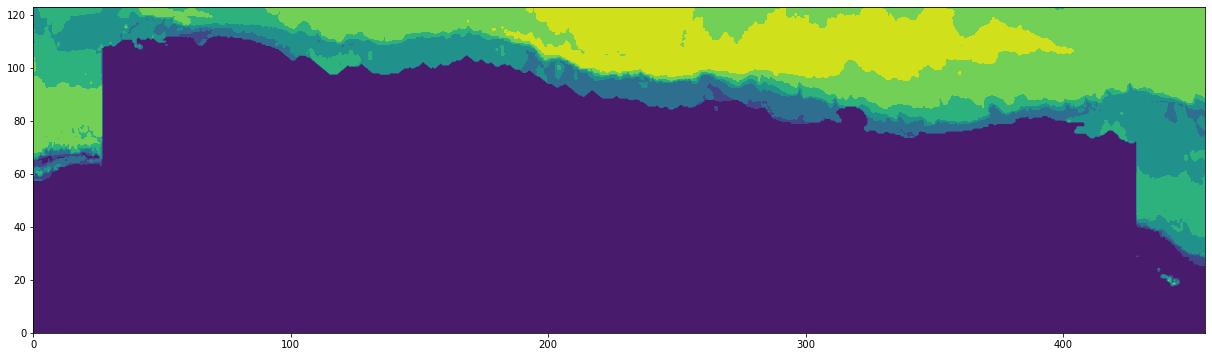

In [39]:
# Plot this to check it 
fig1, ax1 = plt.subplots(figsize=(21,6))
ax1.contourf(x_rho_flat/1000, y_rho_flat/1000, mudfrac_14_tmp[0,0,:,:])

In [40]:
# More sediment grain stuff

# Grain Size
# grain_diameter (sediment median grain diameter size)
grain_diameter_tmp = bed_diam_all
print('grain_diameter: ', grain_diameter_tmp[0,0,0])

# Grain Density
# grain_density (sediment median grain density)
grain_density_tmp = bed_rho_all
print('grain_density: ', grain_density_tmp[0,0,0])

# Settling Velocity
# settling_vel (sediment median grain settling velocity)
settling_vel_tmp = bed_setv_all
print('settling_vel: ', settling_vel_tmp[0,0,0])

# Erosion Stress
# erosion_stress (sediment median critical erosion stress)
# Use the bed_tau_crit/water_density for now
erosion_stress_tmp = bed_eros_str_all
print('erosion_stress: ', erosion_stress_tmp[0,0,0])

# Erodibility
# NOT SURE WHAT TO DO HERE
# dmix_offset (dmix erodibility profile offset)
dmix_offset_tmp2 = nc2.variables['dmix_offset'][:]
dmix_offset_tmp = np.full((time_tmp_len, Mp, Lp), dmix_offset_tmp2[0,0,0], dtype='f8')
print('dmix_offset: ', dmix_offset_tmp[0,0,0])

# dmix_slope (dmix erodibility profile slope)
# NOT SURE WHAT TO DO HERE
dmix_slope_tmp2 = nc2.variables['dmix_slope'][:]
dmix_slope_tmp = np.full((time_tmp_len, Mp, Lp), dmix_slope_tmp2[0,0,0], dtype='f8')
print('dmix_slope: ', dmix_slope_tmp[0,0,0])

# dmix_time (dmix erodibility profile time scale)
# NOT SURE WHAT TO DO HERE
dmix_time_tmp2 = nc2.variables['dmix_time'][:]
dmix_time_tmp = np.full((time_tmp_len, Mp, Lp), dmix_time_tmp2[0,0,0], dtype='f8')
print('dmix_time: ', dmix_time_tmp[0,0,0])

grain_diameter:  0.0
grain_density:  0.0
settling_vel:  0.0
erosion_stress:  0.0
dmix_offset:  -0.469
dmix_slope:  1.0
dmix_time:  0.0


In [41]:
# print(salt_tmp.shape)
# print(zeta_tmp.shape)
print(time_tmp_len)
print(s_rho_tmp)
print(Mp)
print(Lp)
# print(Cs_r_tmp)
#print(hc_tmp)
#print(Cs_r_tmp)

1
20
206
608


In [42]:
#print(hc_tmp)
#print(Cs_r_tmp)
#nc1.close()
#nc2.close()

In [43]:
# Before making the netcdf, CHECK FOR NANS
# Are there nans in anything? Especially things from dbSeabed data?
# If so, replace nans with -999
# Maybe ignore this for now because this was fixed in the dbSeabed data
# But definitely check all of the input files before running ROMS
# using nan_check.py

### Create netcdf file and save information about it

In [44]:
# Name of file I am writing to
init_cond = '/projects/brun1463/ROMS/Beaufort_Shelf_Rivers_Alpine_003/Include/initial_conds_beaufort_shelf_10rivs_13sections_unaggregated_2020_001.nc' 

# Create file to write to
nc = Dataset(init_cond, 'w', format='NETCDF4')

# Global attributes
global_defaults = dict(gridname = 'KakAKgrd_shelf_big010_smooth006.nc',
                      type = 'ROMS initial conditions forcing file',
                      history = 'Created by Brianna Undzis',
                      Conventions = 'CF',
                      Institution = 'University of Colorado Boulder',
                      date = str(datetime.today()))

# Create dictionary for model
d = {}
d = global_defaults

for att, value in d.items():
    setattr(nc, att, value)

# Create dimensions
nc.createDimension('xi_psi', L)
nc.createDimension('xi_rho', Lp)
nc.createDimension('xi_u', L)
nc.createDimension('xi_v', Lp)
nc.createDimension('eta_psi', M)
nc.createDimension('eta_rho', Mp)
nc.createDimension('eta_u', Mp)
nc.createDimension('eta_v', M)
nc.createDimension('s_rho', s_rho_tmp)
nc.createDimension('s_w', s_w_tmp_len)
nc.createDimension('tracer', tracer_tmp_len)
nc.createDimension('Nbed', Nbed_tmp)
nc.createDimension('time', None)
nc.createDimension('one', 1)
nc.createDimension('two', 2)

<class 'netCDF4._netCDF4.Dimension'>: name = 'two', size = 2

### Fill dimensions and variables

In [45]:
#Fill dimensions
# xi_rho = nc.createVariable('xi_rho', 'd', ('xi_rho',), zlib=True)
# xi_rho.long_name = "X coordinate of RHO-points"
# xi_rho.standard_name = "projection_x_coordinate"
# xi_rho.units = "meter"
# xi_rho[:] = xi_rho_tmp[:]

# eta_rho = nc.createVariable('eta_rho', 'd', ('eta_rho',), zlib=True)
# eta_rho.long_name = "Y coordinate of RHO-points"
# eta_rho.standard_name = "projection_y_coordinate"
# eta_rho.units = "meter"
# eta_rho[:] = eta_rho_tmp[:]

In [46]:
# Fill variables
# theta_b
theta_b = nc.createVariable('theta_b', 'f8', ('one',), zlib=True)
theta_b.long_name = 'S-coordinate bottom control parameter'
theta_b.units = '1'
theta_b[:] = theta_b_tmp

# theta_s 
theta_s = nc.createVariable('theta_s', 'f8', ('one',), zlib=True)
theta_s.long_name = 'S-coordinate surface control parameter'
theta_s.units = '1'
theta_s[:] = theta_s_tmp

# Tcline
Tcline = nc.createVariable('Tcline', 'f8', ('one',), zlib=True)
Tcline.long_name = 'S-coordinate surface/bottom layer width'
Tcline.units = 'meter'
Tcline[:] = Tcline_tmp

# hc
hc = nc.createVariable('hc', 'f8', ('one',), zlib=True)
hc.long_name = 'S-coordinate parameter, critical depth'
hc.units = '1'
hc[:] = hc_tmp

# Cs_r
Cs_r = nc.createVariable('Cs_r', 'f8', ('s_rho',), zlib=True)
Cs_r.long_name = 'S-coordinate stretching curves at RHO-points'
Cs_r.units = '1'
Cs_r.valid_min = -1.0
Cs_r.valid_max = 0.0
Cs_r.field = 'Cs_r, scalar'
Cs_r[:] = Cs_r_tmp

# Cs_w
Cs_w = nc.createVariable('Cs_w', 'f8', ('s_w',), zlib=True)
Cs_w.long_name = 'S-coordinate stretching curves at W-points'
Cs_w.units = '1'
Cs_w.valid_min = -1.0
Cs_w.valid_max = 0.0
Cs_w.field = 'Cs_w, scalar'
Cs_w[:] = Cs_w_tmp

# sc_r
sc_r = nc.createVariable('sc_r', 'f8', ('s_rho',), zlib=True)
sc_r.long_name = 'S-coordinate at RHO-points'
sc_r.units = '1'
sc_r.valid_min = -1.0
sc_r.valid_max = 0.0
sc_r.field = 's_rho, scalar'
sc_r[:] = sc_r_tmp

# sc_w
sc_w = nc.createVariable('sc_w', 'f8', ('s_w',), zlib=True)
sc_w.long_name = 'S-coordinate at W-points'
sc_w.units = '1'
sc_w.valid_min = -1.0
sc_w.valid_max = 0.0
sc_w.field = 's_w, scalar'
sc_w[:] = sc_w_tmp

# ocean_time
ocean_time = nc.createVariable('ocean_time', 'f8', ('time',), zlib=True)
ocean_time.long_name = 'seconds since 2000-01-01 00:00:00'
ocean_time.units = 'second'
ocean_time.field = 'ocean_time, scalar, series'
#ocean_time[:] = ocean_time_tmp[:]
ocean_time[:] = ocean_time_tmp

# salinity
salt = nc.createVariable('salt', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
salt.long_name = 'salinity functional'
salt.units = 'PSS'
salt.field = 'salinity, scalar, series'
salt[:,:,:,:] = salt_tmp[:,:,:,:]
print(salt[0,0,0,0]) 
print(salt_tmp[0,0,0,0])

# temperature
temp = nc.createVariable('temp', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
temp.long_name = 'potential temperature functional'
temp.units = 'C'
temp.field = 'temperature, scalar, series'
temp[:,:,:,:] = temp_tmp[:,:,:,:]

# u
u = nc.createVariable('u', 'f8', ('time', 's_rho', 'eta_u', 'xi_u'), zlib=True)
u.long_name = 'u-momentum component'
u.units = 'meter second-1'
u.field = 'u-velocty, scalar, series'
u[:,:,:,:] = u_tmp[:,:,:,:]

# ubar
ubar = nc.createVariable('ubar', 'f8', ('time', 'eta_u', 'xi_u'), zlib=True)
ubar.long_name = 'vertically integrated u-momentum component'
ubar.units = 'meter second-1'
ubar.field = 'ubar-velocity, scalar, series'
ubar[:,:,:] = ubar_tmp[:,:,:]

# v
v = nc.createVariable('v', 'f8', ('time', 's_rho', 'eta_v', 'xi_v'), zlib=True)
v.long_name = 'v-momentum component'
v.units = 'meter second-1'
v.field = 'v-velocity, scalar, series'
v[:,:,:,:] = v_tmp[:,:,:,:]

# vbar
vbar = nc.createVariable('vbar', 'f8', ('time', 'eta_v', 'xi_v'), zlib=True)
vbar.long_name = 'vertically integrated v-momentum component'
vbar.units = 'meter second-1'
vbar.field = 'vbar-velocity, scalar, series'
vbar[:,:,:] = vbar_tmp[:,:,:]

# zeta
zeta = nc.createVariable('zeta', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
zeta.long_name = 'free-surface'
zeta.units = 'meter'
zeta.field = 'free-surface, scalar, series'
zeta[:,:,:] = zeta_tmp[:,:,:]

# bathymetry
bath = nc.createVariable('bath', 'f8', ('eta_rho', 'xi_rho'), zlib=True)
bath.long_name = 'bathymetry'
bath.units = 'meter'
bath.field = 'bathymetry, scalar, series'
bath[:,:] = bath_tmp[:,:]

# seabed mud
mud_01 = nc.createVariable('mud_01', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_01.long_name = 'suspended cohesive sediment, size class 01'
mud_01.units = 'kilogram m-3'
mud_01.time = 'ocean_time'
mud_01.field = 'mud_01, scalar, series'
mud_01[:,:,:,:] = mud_01_tmp[:,:,:,:]

mudfrac_01 = nc.createVariable('mudfrac_01', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_01.long_name = 'cohesive sediment fraction, size class 01'
mudfrac_01.units = 'nondimensional'
mudfrac_01.time = 'ocean_time'
mudfrac_01.field = 'mudfrac_01, scalar, series'
mudfrac_01[:,:,:,:] = mudfrac_01_tmp[:,:,:,:]

mudmass_01 = nc.createVariable('mudmass_01', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_01.long_name = 'cohesive sediment mass, size class 01'
mudmass_01.units = 'kilogram meter-2'
mudmass_01.time = 'ocean_time'
mudmass_01.field = 'mudmass_01, scalar, series'
mudmass_01[:,:,:,:] = mudmass_01_tmp[:,:,:,:]

# seabed sand
sand_01 = nc.createVariable('sand_01', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
sand_01.long_name = 'suspended noncohesive sediment, size class 01'
sand_01.units = 'kilogram m-3'
sand_01.time = 'ocean_time'
sand_01.field = 'sand_01, scalar, series'
sand_01[:,:,:,:] = sand_01_tmp[:,:,:,:]

sandfrac_01 = nc.createVariable('sandfrac_01', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
sandfrac_01.long_name = 'noncohesive sediment fraction, size class 01'
sandfrac_01.units = 'nondimensional'
sandfrac_01.time = 'ocean_time'
sandfrac_01.field = 'sandfrac_01, scalar, series'
sandfrac_01[:,:,:,:] = sandfrac_01_tmp[:,:,:,:]

sandmass_01 = nc.createVariable('sandmass_01', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
sandmass_01.long_name = 'noncohesive sediment mass, size class 01'
sandmass_01.units = 'kilogram meter-2'
sandmass_01.time = 'ocean_time'
sandmass_01.field = 'sandmass_01, scalar, series'
sandmass_01[:,:,:,:] = sandmass_01_tmp[:,:,:,:]

sand_02 = nc.createVariable('sand_02', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
sand_02.long_name = 'suspended noncohesive sediment, size class 02'
sand_02.units = 'kilogram m-3'
sand_02.time = 'ocean_time'
sand_02.field = 'sand_02, scalar, series'
sand_02[:,:,:,:] = sand_02_tmp[:,:,:,:]

sandfrac_02 = nc.createVariable('sandfrac_02', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
sandfrac_02.long_name = 'noncohesive sediment fraction, size class 02'
sandfrac_02.units = 'nondimensional'
sandfrac_02.time = 'ocean_time'
sandfrac_02.field = 'sandfrac_02, scalar, series'
sandfrac_02[:,:,:,:] = sandfrac_02_tmp[:,:,:,:]

sandmass_02 = nc.createVariable('sandmass_02', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
sandmass_02.long_name = 'noncohesive sediment mass, size class 02'
sandmass_02.units = 'kilogram meter-2'
sandmass_02.time = 'ocean_time'
sandmass_02.field = 'sandmass_02, scalar, series'
sandmass_02[:,:,:,:] = sandmass_02_tmp[:,:,:,:]

sand_03 = nc.createVariable('sand_03', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
sand_03.long_name = 'suspended noncohesive sediment, size class 03'
sand_03.units = 'kilogram m-3'
sand_03.time = 'ocean_time'
sand_03.field = 'sand_03, scalar, series'
sand_03[:,:,:,:] = sand_03_tmp[:,:,:,:]

sandfrac_03 = nc.createVariable('sandfrac_03', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
sandfrac_03.long_name = 'noncohesive sediment fraction, size class 03'
sandfrac_03.units = 'nondimensional'
sandfrac_03.time = 'ocean_time'
sandfrac_03.field = 'sandfrac_03, scalar, series'
sandfrac_03[:,:,:,:] = sandfrac_03_tmp[:,:,:,:]

sandmass_03 = nc.createVariable('sandmass_03', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
sandmass_03.long_name = 'noncohesive sediment mass, size class 03'
sandmass_03.units = 'kilogram meter-2'
sandmass_03.time = 'ocean_time'
sandmass_03.field = 'sandmass_03, scalar, series'
sandmass_03[:,:,:,:] = sandmass_03_tmp[:,:,:,:]

# bed information
bed_thickness = nc.createVariable('bed_thickness', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
bed_thickness.long_name = 'sediment layer thickness'
bed_thickness.units = 'meter'
bed_thickness.time = 'ocean_time'
bed_thickness.field = 'bed_thickness, scalar, series'
bed_thickness[:,:,:,:] = bed_thickness_tmp[:,:,:,:]

bed_age = nc.createVariable('bed_age', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
bed_age.long_name = 'sediment layer age'
bed_age.units = 'day'
bed_age.time = 'ocean_time'
bed_age.field = 'bed_age, scalar, series'
bed_age[:,:,:,:] = bed_age_tmp[:,:,:,:]

bed_porosity = nc.createVariable('bed_porosity', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
bed_porosity.long_name = 'sediment layer porosity'
bed_porosity.units = 'nondimensional'
bed_porosity.time = 'ocean_time'
bed_porosity.field = 'bed_porosity, scalar, series'
bed_porosity[:,:,:,:] = bed_porosity_tmp[:,:,:,:]

bed_biodiff = nc.createVariable('bed_biodiff', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
bed_biodiff.long_name = 'biodiffusivity at bottom of each layer'
bed_biodiff.units = 'meter2 second-1'
bed_biodiff.time = 'ocean_time'
bed_biodiff.field = 'bed_biodiff, scalar, series'
bed_biodiff[:,:,:,:] = bed_biodiff_tmp[:,:,:,:]

bed_tau_crit = nc.createVariable('bed_tau_crit', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
bed_tau_crit.long_name = 'tau critical in each layer'
bed_tau_crit.units = 'Newtons meter-2'
bed_tau_crit.field = 'bed_tau_crit, scalar, series'
bed_tau_crit[:,:,:,:] = bed_tau_crit_tmp[:,:,:,:]

# grain diameter
grain_diameter = nc.createVariable('grain_diameter', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
grain_diameter.long_name = 'sediment median grain diameter size'
grain_diameter.units = 'meter'
grain_diameter.time = 'ocean_time'
grain_diameter.field = 'grain_diameter, scalar, series'
grain_diameter[:,:,:] = grain_diameter_tmp[:,:,:]

# grain density
grain_density = nc.createVariable('grain_density', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
grain_density.long_name = 'sediment median grain density'
grain_density.units = 'kilogram meter-3'
grain_density.time = 'ocean_time'
grain_density.field = 'grain_density, scalar, series'
grain_density[:,:,:] = grain_density_tmp[:,:,:]

# settling velocity
settling_vel = nc.createVariable('settling_vel', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
settling_vel.long_name = 'sediment median grain settling velocity'
settling_vel.units = 'meter second-1'
settling_vel.time = 'ocean_time'
settling_vel.field = 'settling_vel, scalar, series'
settling_vel[:,:,:] = settling_vel_tmp[:,:,:]

# erosion stress
erosion_stress = nc.createVariable('erosion_stress', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
erosion_stress.long_name = 'sediment median critical erosion stress'
erosion_stress.units = 'meter2 second-2'
erosion_stress.time = 'ocean_time'
erosion_stress.field = 'erosion_stress, scalar, series'
erosion_stress[:,:,:] = erosion_stress_tmp[:,:,:]

# dmix offset
dmix_offset = nc.createVariable('dmix_offset', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
dmix_offset.long_name = 'dmix erodibility profile offset'
dmix_offset.units = 'meter'
dmix_offset.time = 'ocean_time'
dmix_offset.field = 'dmix_offset, scalar, series'
dmix_offset[:,:,:] = dmix_offset_tmp[:,:,:]

# dmix slope
dmix_slope = nc.createVariable('dmix_slope', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
dmix_slope.long_name = 'dmix erodibility profile slope'
dmix_slope.units = '_'
dmix_slope.time = 'ocean_time'
dmix_slope.field = 'dmix_slope, scalar, series'
dmix_slope[:,:,:] = dmix_slope_tmp[:,:,:]

# dmix time
dmix_time = nc.createVariable('dmix_time', 'f8', ('time', 'eta_rho', 'xi_rho'), zlib=True)
dmix_time.long_name = 'dmix erodibility profile time scale'
dmix_time.units = 'seconds'
dmix_time.time = 'ocean_time'
dmix_time.field = 'dmix_time, scalar, series'
dmix_time[:,:,:] = dmix_time_tmp[:,:,:]


#nc.close()

0.0
0.0


In [47]:
# Add all the seabed section sediments to the netcdf 

# Mud02/Section 1
mud_02 = nc.createVariable('mud_02', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_02.long_name = 'suspended chesive sediment, size class 02'
mud_02.units = 'kilogram m-3'
mud_02.time = 'ocean_time'
mud_02.field = 'mud_02, scalar, series'
mud_02[:,:,:,:] = mud_02_tmp[:,:,:,:]

mudfrac_02 = nc.createVariable('mudfrac_02', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_02.long_name = 'cohesive sediment fraction, size class 02'
mudfrac_02.units = 'nondimensional'
mudfrac_02.time = 'ocean_time'
mudfrac_02.field = 'mudfrac_02, scalar, series'
mudfrac_02[:,:,:,:] = mudfrac_02_tmp[:,:,:,:]

mudmass_02 = nc.createVariable('mudmass_02', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_02.long_name = 'cohesive sediment mass, size class 02'
mudmass_02.units = 'kilogram meter-2'
mudmass_02.time = 'ocean_time'
mudmass_02.field = 'mudmass_02, scalar, series'
mudmass_02[:,:,:,:] = mudmass_02_tmp[:,:,:,:]

# Mud03/Section 2
mud_03 = nc.createVariable('mud_03', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_03.long_name = 'suspended chesive sediment, size class 03'
mud_03.units = 'kilogram m-3'
mud_03.time = 'ocean_time'
mud_03.field = 'mud_03, scalar, series'
mud_03[:,:,:,:] = mud_03_tmp[:,:,:,:]

mudfrac_03 = nc.createVariable('mudfrac_03', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_03.long_name = 'cohesive sediment fraction, size class 03'
mudfrac_03.units = 'nondimensional'
mudfrac_03.time = 'ocean_time'
mudfrac_03.field = 'mudfrac_03, scalar, series'
mudfrac_03[:,:,:,:] = mudfrac_03_tmp[:,:,:,:]

mudmass_03 = nc.createVariable('mudmass_03', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_03.long_name = 'cohesive sediment mass, size class 03'
mudmass_03.units = 'kilogram meter-2'
mudmass_03.time = 'ocean_time'
mudmass_03.field = 'mudmass_03, scalar, series'
mudmass_03[:,:,:,:] = mudmass_03_tmp[:,:,:,:]

# Mud04/Section 3
mud_04 = nc.createVariable('mud_04', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_04.long_name = 'suspended chesive sediment, size class 04'
mud_04.units = 'kilogram m-3'
mud_04.time = 'ocean_time'
mud_04.field = 'mud_04, scalar, series'
mud_04[:,:,:,:] = mud_04_tmp[:,:,:,:]

mudfrac_04 = nc.createVariable('mudfrac_04', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_04.long_name = 'cohesive sediment fraction, size class 04'
mudfrac_04.units = 'nondimensional'
mudfrac_04.time = 'ocean_time'
mudfrac_04.field = 'mudfrac_04, scalar, series'
mudfrac_04[:,:,:,:] = mudfrac_04_tmp[:,:,:,:]

mudmass_04 = nc.createVariable('mudmass_04', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_04.long_name = 'cohesive sediment mass, size class 04'
mudmass_04.units = 'kilogram meter-2'
mudmass_04.time = 'ocean_time'
mudmass_04.field = 'mudmass_04, scalar, series'
mudmass_04[:,:,:,:] = mudmass_04_tmp[:,:,:,:]

# Mud05/Section 4
mud_05 = nc.createVariable('mud_05', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_05.long_name = 'suspended chesive sediment, size class 05'
mud_05.units = 'kilogram m-3'
mud_05.time = 'ocean_time'
mud_05.field = 'mud_05, scalar, series'
mud_05[:,:,:,:] = mud_05_tmp[:,:,:,:]

mudfrac_05 = nc.createVariable('mudfrac_05', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_05.long_name = 'cohesive sediment fraction, size class 05'
mudfrac_05.units = 'nondimensional'
mudfrac_05.time = 'ocean_time'
mudfrac_05.field = 'mudfrac_05, scalar, series'
mudfrac_05[:,:,:,:] = mudfrac_05_tmp[:,:,:,:]

mudmass_05 = nc.createVariable('mudmass_05', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_05.long_name = 'cohesive sediment mass, size class 05'
mudmass_05.units = 'kilogram meter-2'
mudmass_05.time = 'ocean_time'
mudmass_05.field = 'mudmass_05, scalar, series'
mudmass_05[:,:,:,:] = mudmass_05_tmp[:,:,:,:]

# Mud06/Section 5
mud_06 = nc.createVariable('mud_06', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_06.long_name = 'suspended chesive sediment, size class 06'
mud_06.units = 'kilogram m-3'
mud_06.time = 'ocean_time'
mud_06.field = 'mud_06, scalar, series'
mud_06[:,:,:,:] = mud_06_tmp[:,:,:,:]

mudfrac_06 = nc.createVariable('mudfrac_06', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_06.long_name = 'cohesive sediment fraction, size class 06'
mudfrac_06.units = 'nondimensional'
mudfrac_06.time = 'ocean_time'
mudfrac_06.field = 'mudfrac_06, scalar, series'
mudfrac_06[:,:,:,:] = mudfrac_06_tmp[:,:,:,:]

mudmass_06 = nc.createVariable('mudmass_06', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_06.long_name = 'cohesive sediment mass, size class 06'
mudmass_06.units = 'kilogram meter-2'
mudmass_06.time = 'ocean_time'
mudmass_06.field = 'mudmass_06, scalar, series'
mudmass_06[:,:,:,:] = mudmass_06_tmp[:,:,:,:]

# Mud07/Section 6
mud_07 = nc.createVariable('mud_07', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_07.long_name = 'suspended chesive sediment, size class 07'
mud_07.units = 'kilogram m-3'
mud_07.time = 'ocean_time'
mud_07.field = 'mud_07, scalar, series'
mud_07[:,:,:,:] = mud_07_tmp[:,:,:,:]

mudfrac_07 = nc.createVariable('mudfrac_07', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_07.long_name = 'cohesive sediment fraction, size class 07'
mudfrac_07.units = 'nondimensional'
mudfrac_07.time = 'ocean_time'
mudfrac_07.field = 'mudfrac_07, scalar, series'
mudfrac_07[:,:,:,:] = mudfrac_07_tmp[:,:,:,:]

mudmass_07 = nc.createVariable('mudmass_07', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_07.long_name = 'cohesive sediment mass, size class 07'
mudmass_07.units = 'kilogram meter-2'
mudmass_07.time = 'ocean_time'
mudmass_07.field = 'mudmass_07, scalar, series'
mudmass_07[:,:,:,:] = mudmass_07_tmp[:,:,:,:]

# Mud08/Section 7
mud_08 = nc.createVariable('mud_08', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_08.long_name = 'suspended chesive sediment, size class 08'
mud_08.units = 'kilogram m-3'
mud_08.time = 'ocean_time'
mud_08.field = 'mud_08, scalar, series'
mud_08[:,:,:,:] = mud_08_tmp[:,:,:,:]

mudfrac_08 = nc.createVariable('mudfrac_08', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_08.long_name = 'cohesive sediment fraction, size class 08'
mudfrac_08.units = 'nondimensional'
mudfrac_08.time = 'ocean_time'
mudfrac_08.field = 'mudfrac_08, scalar, series'
mudfrac_08[:,:,:,:] = mudfrac_08_tmp[:,:,:,:]

mudmass_08 = nc.createVariable('mudmass_08', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_08.long_name = 'cohesive sediment mass, size class 08'
mudmass_08.units = 'kilogram meter-2'
mudmass_08.time = 'ocean_time'
mudmass_08.field = 'mudmass_08, scalar, series'
mudmass_08[:,:,:,:] = mudmass_08_tmp[:,:,:,:]

# Mud09/Section 8
mud_09 = nc.createVariable('mud_09', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_09.long_name = 'suspended chesive sediment, size class 09'
mud_09.units = 'kilogram m-3'
mud_09.time = 'ocean_time'
mud_09.field = 'mud_09, scalar, series'
mud_09[:,:,:,:] = mud_09_tmp[:,:,:,:]

mudfrac_09 = nc.createVariable('mudfrac_09', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_09.long_name = 'cohesive sediment fraction, size class 09'
mudfrac_09.units = 'nondimensional'
mudfrac_09.time = 'ocean_time'
mudfrac_09.field = 'mudfrac_09, scalar, series'
mudfrac_09[:,:,:,:] = mudfrac_09_tmp[:,:,:,:]

mudmass_09 = nc.createVariable('mudmass_09', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_09.long_name = 'cohesive sediment mass, size class 09'
mudmass_09.units = 'kilogram meter-2'
mudmass_09.time = 'ocean_time'
mudmass_09.field = 'mudmass_09, scalar, series'
mudmass_09[:,:,:,:] = mudmass_09_tmp[:,:,:,:]

# Mud10/Section 9
mud_10 = nc.createVariable('mud_10', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_10.long_name = 'suspended chesive sediment, size class 10'
mud_10.units = 'kilogram m-3'
mud_10.time = 'ocean_time'
mud_10.field = 'mud_10, scalar, series'
mud_10[:,:,:,:] = mud_10_tmp[:,:,:,:]

mudfrac_10 = nc.createVariable('mudfrac_10', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_10.long_name = 'cohesive sediment fraction, size class 10'
mudfrac_10.units = 'nondimensional'
mudfrac_10.time = 'ocean_time'
mudfrac_10.field = 'mudfrac_10, scalar, series'
mudfrac_10[:,:,:,:] = mudfrac_10_tmp[:,:,:,:]

mudmass_10 = nc.createVariable('mudmass_10', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_10.long_name = 'cohesive sediment mass, size class 10'
mudmass_10.units = 'kilogram meter-2'
mudmass_10.time = 'ocean_time'
mudmass_10.field = 'mudmass_10, scalar, series'
mudmass_10[:,:,:,:] = mudmass_10_tmp[:,:,:,:]

# Mud11/Section 10
mud_11 = nc.createVariable('mud_11', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_11.long_name = 'suspended chesive sediment, size class 11'
mud_11.units = 'kilogram m-3'
mud_11.time = 'ocean_time'
mud_11.field = 'mud_11, scalar, series'
mud_11[:,:,:,:] = mud_11_tmp[:,:,:,:]

mudfrac_11 = nc.createVariable('mudfrac_11', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_11.long_name = 'cohesive sediment fraction, size class 11'
mudfrac_11.units = 'nondimensional'
mudfrac_11.time = 'ocean_time'
mudfrac_11.field = 'mudfrac_11, scalar, series'
mudfrac_11[:,:,:,:] = mudfrac_11_tmp[:,:,:,:]

mudmass_11 = nc.createVariable('mudmass_11', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_11.long_name = 'cohesive sediment mass, size class 11'
mudmass_11.units = 'kilogram meter-2'
mudmass_11.time = 'ocean_time'
mudmass_11.field = 'mudmass_11, scalar, series'
mudmass_11[:,:,:,:] = mudmass_11_tmp[:,:,:,:]

# Mud12/Section 11
mud_12 = nc.createVariable('mud_12', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_12.long_name = 'suspended chesive sediment, size class 12'
mud_12.units = 'kilogram m-3'
mud_12.time = 'ocean_time'
mud_12.field = 'mud_12, scalar, series'
mud_12[:,:,:,:] = mud_12_tmp[:,:,:,:]

mudfrac_12 = nc.createVariable('mudfrac_12', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_12.long_name = 'cohesive sediment fraction, size class 12'
mudfrac_12.units = 'nondimensional'
mudfrac_12.time = 'ocean_time'
mudfrac_12.field = 'mudfrac_12, scalar, series'
mudfrac_12[:,:,:,:] = mudfrac_12_tmp[:,:,:,:]

mudmass_12 = nc.createVariable('mudmass_12', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_12.long_name = 'cohesive sediment mass, size class 12'
mudmass_12.units = 'kilogram meter-2'
mudmass_12.time = 'ocean_time'
mudmass_12.field = 'mudmass_12, scalar, series'
mudmass_12[:,:,:,:] = mudmass_12_tmp[:,:,:,:]

# Mud13/Section 12
mud_13 = nc.createVariable('mud_13', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_13.long_name = 'suspended chesive sediment, size class 13'
mud_13.units = 'kilogram m-3'
mud_13.time = 'ocean_time'
mud_13.field = 'mud_13, scalar, series'
mud_13[:,:,:,:] = mud_13_tmp[:,:,:,:]

mudfrac_13 = nc.createVariable('mudfrac_13', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_13.long_name = 'cohesive sediment fraction, size class 13'
mudfrac_13.units = 'nondimensional'
mudfrac_13.time = 'ocean_time'
mudfrac_13.field = 'mudfrac_13, scalar, series'
mudfrac_13[:,:,:,:] = mudfrac_13_tmp[:,:,:,:]

mudmass_13 = nc.createVariable('mudmass_13', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_13.long_name = 'cohesive sediment mass, size class 13'
mudmass_13.units = 'kilogram meter-2'
mudmass_13.time = 'ocean_time'
mudmass_13.field = 'mudmass_13, scalar, series'
mudmass_13[:,:,:,:] = mudmass_13_tmp[:,:,:,:]

# Mud14/Section 13
mud_14 = nc.createVariable('mud_14', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_14.long_name = 'suspended chesive sediment, size class 14'
mud_14.units = 'kilogram m-3'
mud_14.time = 'ocean_time'
mud_14.field = 'mud_14, scalar, series'
mud_14[:,:,:,:] = mud_14_tmp[:,:,:,:]

mudfrac_14 = nc.createVariable('mudfrac_14', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_14.long_name = 'cohesive sediment fraction, size class 14'
mudfrac_14.units = 'nondimensional'
mudfrac_14.time = 'ocean_time'
mudfrac_14.field = 'mudfrac_14, scalar, series'
mudfrac_14[:,:,:,:] = mudfrac_14_tmp[:,:,:,:]

mudmass_14 = nc.createVariable('mudmass_14', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_14.long_name = 'cohesive sediment mass, size class 14'
mudmass_14.units = 'kilogram meter-2'
mudmass_14.time = 'ocean_time'
mudmass_14.field = 'mudmass_14, scalar, series'
mudmass_14[:,:,:,:] = mudmass_14_tmp[:,:,:,:]

In [48]:
# Add all the river sediment classes to the netcdf even though they are all zeros

# mud15
mud_15 = nc.createVariable('mud_15', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_15.long_name = 'suspended chesive sediment, size class 15'
mud_15.units = 'kilogram m-3'
mud_15.time = 'ocean_time'
mud_15.field = 'mud_15, scalar, series'
mud_15[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_15 = nc.createVariable('mudfrac_15', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_15.long_name = 'cohesive sediment fraction, size class 15'
mudfrac_15.units = 'nondimensional'
mudfrac_15.time = 'ocean_time'
mudfrac_15.field = 'mudfrac_15, scalar, series'
mudfrac_15[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_15 = nc.createVariable('mudmass_15', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_15.long_name = 'cohesive sediment mass, size class 15'
mudmass_15.units = 'kilogram meter-2'
mudmass_15.time = 'ocean_time'
mudmass_15.field = 'mudmass_15, scalar, series'
mudmass_15[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud16
mud_16 = nc.createVariable('mud_16', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_16.long_name = 'suspended chesive sediment, size class 16'
mud_16.units = 'kilogram m-3'
mud_16.time = 'ocean_time'
mud_16.field = 'mud_16, scalar, series'
mud_16[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_16 = nc.createVariable('mudfrac_16', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_16.long_name = 'cohesive sediment fraction, size class 16'
mudfrac_16.units = 'nondimensional'
mudfrac_16.time = 'ocean_time'
mudfrac_16.field = 'mudfrac_16, scalar, series'
mudfrac_16[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_16 = nc.createVariable('mudmass_16', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_16.long_name = 'cohesive sediment mass, size class 16'
mudmass_16.units = 'kilogram meter-2'
mudmass_16.time = 'ocean_time'
mudmass_16.field = 'mudmass_16, scalar, series'
mudmass_16[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud17
mud_17 = nc.createVariable('mud_17', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_17.long_name = 'suspended chesive sediment, size class 17'
mud_17.units = 'kilogram m-3'
mud_17.time = 'ocean_time'
mud_17.field = 'mud_17, scalar, series'
mud_17[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_17 = nc.createVariable('mudfrac_17', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_17.long_name = 'cohesive sediment fraction, size class 17'
mudfrac_17.units = 'nondimensional'
mudfrac_17.time = 'ocean_time'
mudfrac_17.field = 'mudfrac_17, scalar, series'
mudfrac_17[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_17 = nc.createVariable('mudmass_17', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_17.long_name = 'cohesive sediment mass, size class 17'
mudmass_17.units = 'kilogram meter-2'
mudmass_17.time = 'ocean_time'
mudmass_17.field = 'mudmass_17, scalar, series'
mudmass_17[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud18
mud_18 = nc.createVariable('mud_18', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_18.long_name = 'suspended chesive sediment, size class 18'
mud_18.units = 'kilogram m-3'
mud_18.time = 'ocean_time'
mud_18.field = 'mud_18, scalar, series'
mud_18[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_18 = nc.createVariable('mudfrac_18', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_18.long_name = 'cohesive sediment fraction, size class 18'
mudfrac_18.units = 'nondimensional'
mudfrac_18.time = 'ocean_time'
mudfrac_18.field = 'mudfrac_18, scalar, series'
mudfrac_18[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_18 = nc.createVariable('mudmass_18', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_18.long_name = 'cohesive sediment mass, size class 18'
mudmass_18.units = 'kilogram meter-2'
mudmass_18.time = 'ocean_time'
mudmass_18.field = 'mudmass_18, scalar, series'
mudmass_18[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud19
mud_19 = nc.createVariable('mud_19', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_19.long_name = 'suspended chesive sediment, size class 19'
mud_19.units = 'kilogram m-3'
mud_19.time = 'ocean_time'
mud_19.field = 'mud_19, scalar, series'
mud_19[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_19 = nc.createVariable('mudfrac_19', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_19.long_name = 'cohesive sediment fraction, size class 19'
mudfrac_19.units = 'nondimensional'
mudfrac_19.time = 'ocean_time'
mudfrac_19.field = 'mudfrac_19, scalar, series'
mudfrac_19[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_19 = nc.createVariable('mudmass_19', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_19.long_name = 'cohesive sediment mass, size class 19'
mudmass_19.units = 'kilogram meter-2'
mudmass_19.time = 'ocean_time'
mudmass_19.field = 'mudmass_19, scalar, series'
mudmass_19[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud20
mud_20 = nc.createVariable('mud_20', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_20.long_name = 'suspended chesive sediment, size class 20'
mud_20.units = 'kilogram m-3'
mud_20.time = 'ocean_time'
mud_20.field = 'mud_20, scalar, series'
mud_20[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_20 = nc.createVariable('mudfrac_20', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_20.long_name = 'cohesive sediment fraction, size class 20'
mudfrac_20.units = 'nondimensional'
mudfrac_20.time = 'ocean_time'
mudfrac_20.field = 'mudfrac_20, scalar, series'
mudfrac_20[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_20 = nc.createVariable('mudmass_20', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_20.long_name = 'cohesive sediment mass, size class 20'
mudmass_20.units = 'kilogram meter-2'
mudmass_20.time = 'ocean_time'
mudmass_20.field = 'mudmass_20, scalar, series'
mudmass_20[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud21
mud_21 = nc.createVariable('mud_21', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_21.long_name = 'suspended chesive sediment, size class 21'
mud_21.units = 'kilogram m-3'
mud_21.time = 'ocean_time'
mud_21.field = 'mud_21, scalar, series'
mud_21[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_21 = nc.createVariable('mudfrac_21', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_21.long_name = 'cohesive sediment fraction, size class 21'
mudfrac_21.units = 'nondimensional'
mudfrac_21.time = 'ocean_time'
mudfrac_21.field = 'mudfrac_21, scalar, series'
mudfrac_21[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_21 = nc.createVariable('mudmass_21', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_21.long_name = 'cohesive sediment mass, size class 21'
mudmass_21.units = 'kilogram meter-2'
mudmass_21.time = 'ocean_time'
mudmass_21.field = 'mudmass_21, scalar, series'
mudmass_21[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud22
mud_22 = nc.createVariable('mud_22', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_22.long_name = 'suspended chesive sediment, size class 22'
mud_22.units = 'kilogram m-3'
mud_22.time = 'ocean_time'
mud_22.field = 'mud_22, scalar, series'
mud_22[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_22 = nc.createVariable('mudfrac_22', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_22.long_name = 'cohesive sediment fraction, size class 22'
mudfrac_22.units = 'nondimensional'
mudfrac_22.time = 'ocean_time'
mudfrac_22.field = 'mudfrac_22, scalar, series'
mudfrac_22[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_22 = nc.createVariable('mudmass_22', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_22.long_name = 'cohesive sediment mass, size class 22'
mudmass_22.units = 'kilogram meter-2'
mudmass_22.time = 'ocean_time'
mudmass_22.field = 'mudmass_22, scalar, series'
mudmass_22[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud23
mud_23 = nc.createVariable('mud_23', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_23.long_name = 'suspended chesive sediment, size class 23'
mud_23.units = 'kilogram m-3'
mud_23.time = 'ocean_time'
mud_23.field = 'mud_23, scalar, series'
mud_23[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_23 = nc.createVariable('mudfrac_23', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_23.long_name = 'cohesive sediment fraction, size class 23'
mudfrac_23.units = 'nondimensional'
mudfrac_23.time = 'ocean_time'
mudfrac_23.field = 'mudfrac_23, scalar, series'
mudfrac_23[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_23 = nc.createVariable('mudmass_23', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_23.long_name = 'cohesive sediment mass, size class 23'
mudmass_23.units = 'kilogram meter-2'
mudmass_23.time = 'ocean_time'
mudmass_23.field = 'mudmass_23, scalar, series'
mudmass_23[:,:,:,:] = riv_mud_mass[:,:,:,:]


# mud24
mud_24 = nc.createVariable('mud_24', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
mud_24.long_name = 'suspended chesive sediment, size class 24'
mud_24.units = 'kilogram m-3'
mud_24.time = 'ocean_time'
mud_24.field = 'mud_24, scalar, series'
mud_24[:,:,:,:] = riv_mud_ssc[:,:,:,:]

mudfrac_24 = nc.createVariable('mudfrac_24', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudfrac_24.long_name = 'cohesive sediment fraction, size class 24'
mudfrac_24.units = 'nondimensional'
mudfrac_24.time = 'ocean_time'
mudfrac_24.field = 'mudfrac_24, scalar, series'
mudfrac_24[:,:,:,:] = riv_mud_frac[:,:,:,:]

mudmass_24 = nc.createVariable('mudmass_24', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
mudmass_24.long_name = 'cohesive sediment mass, size class 24'
mudmass_24.units = 'kilogram meter-2'
mudmass_24.time = 'ocean_time'
mudmass_24.field = 'mudmass_24, scalar, series'
mudmass_24[:,:,:,:] = riv_mud_mass[:,:,:,:]


# # mud25
# mud_25 = nc.createVariable('mud_25', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
# mud_25.long_name = 'suspended chesive sediment, size class 25'
# mud_25.units = 'kilogram m-3'
# mud_25.time = 'ocean_time'
# mud_25.field = 'mud_25, scalar, series'
# mud_25[:,:,:,:] = riv_mud_ssc[:,:,:,:]

# mudfrac_25 = nc.createVariable('mudfrac_25', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudfrac_25.long_name = 'cohesive sediment fraction, size class 25'
# mudfrac_25.units = 'nondimensional'
# mudfrac_25.time = 'ocean_time'
# mudfrac_25.field = 'mudfrac_25, scalar, series'
# mudfrac_25[:,:,:,:] = riv_mud_frac[:,:,:,:]

# mudmass_25 = nc.createVariable('mudmass_25', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudmass_25.long_name = 'cohesive sediment mass, size class 25'
# mudmass_25.units = 'kilogram meter-2'
# mudmass_25.time = 'ocean_time'
# mudmass_25.field = 'mudmass_25, scalar, series'
# mudmass_25[:,:,:,:] = riv_mud_mass[:,:,:,:]


# # mud26
# mud_26 = nc.createVariable('mud_26', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
# mud_26.long_name = 'suspended chesive sediment, size class 26'
# mud_26.units = 'kilogram m-3'
# mud_26.time = 'ocean_time'
# mud_26.field = 'mud_26, scalar, series'
# mud_26[:,:,:,:] = riv_mud_ssc[:,:,:,:]

# mudfrac_26 = nc.createVariable('mudfrac_26', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudfrac_26.long_name = 'cohesive sediment fraction, size class 26'
# mudfrac_26.units = 'nondimensional'
# mudfrac_26.time = 'ocean_time'
# mudfrac_26.field = 'mudfrac_26, scalar, series'
# mudfrac_26[:,:,:,:] = riv_mud_frac[:,:,:,:]

# mudmass_26 = nc.createVariable('mudmass_26', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudmass_26.long_name = 'cohesive sediment mass, size class 26'
# mudmass_26.units = 'kilogram meter-2'
# mudmass_26.time = 'ocean_time'
# mudmass_26.field = 'mudmass_26, scalar, series'
# mudmass_26[:,:,:,:] = riv_mud_mass[:,:,:,:]


# # mud27
# mud_27 = nc.createVariable('mud_27', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
# mud_27.long_name = 'suspended chesive sediment, size class 27'
# mud_27.units = 'kilogram m-3'
# mud_27.time = 'ocean_time'
# mud_27.field = 'mud_27, scalar, series'
# mud_27[:,:,:,:] = riv_mud_ssc[:,:,:,:]

# mudfrac_27 = nc.createVariable('mudfrac_27', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudfrac_27.long_name = 'cohesive sediment fraction, size class 27'
# mudfrac_27.units = 'nondimensional'
# mudfrac_27.time = 'ocean_time'
# mudfrac_27.field = 'mudfrac_27, scalar, series'
# mudfrac_27[:,:,:,:] = riv_mud_frac[:,:,:,:]

# mudmass_27 = nc.createVariable('mudmass_27', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudmass_27.long_name = 'cohesive sediment mass, size class 27'
# mudmass_27.units = 'kilogram meter-2'
# mudmass_27.time = 'ocean_time'
# mudmass_27.field = 'mudmass_27, scalar, series'
# mudmass_27[:,:,:,:] = riv_mud_mass[:,:,:,:]


# # mud28
# mud_28 = nc.createVariable('mud_28', 'f8', ('time', 's_rho', 'eta_rho', 'xi_rho'), zlib=True)
# mud_28.long_name = 'suspended chesive sediment, size class 28'
# mud_28.units = 'kilogram m-3'
# mud_28.time = 'ocean_time'
# mud_28.field = 'mud_28, scalar, series'
# mud_28[:,:,:,:] = riv_mud_ssc[:,:,:,:]

# mudfrac_28 = nc.createVariable('mudfrac_28', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudfrac_28.long_name = 'cohesive sediment fraction, size class 28'
# mudfrac_28.units = 'nondimensional'
# mudfrac_28.time = 'ocean_time'
# mudfrac_28.field = 'mudfrac_28, scalar, series'
# mudfrac_28[:,:,:,:] = riv_mud_frac[:,:,:,:]

# mudmass_28 = nc.createVariable('mudmass_28', 'f8', ('time', 'Nbed', 'eta_rho', 'xi_rho'), zlib=True)
# mudmass_28.long_name = 'cohesive sediment mass, size class 28'
# mudmass_28.units = 'kilogram meter-2'
# mudmass_28.time = 'ocean_time'
# mudmass_28.field = 'mudmass_28, scalar, series'
# mudmass_28[:,:,:,:] = riv_mud_mass[:,:,:,:]


nc.close()

In [49]:
# Close the netcdf files
# grid file
nc1.close()

# restrat_mix_ini.nc file
nc2.close()